<a href="https://colab.research.google.com/github/realBagher/Image_Processing_OpenCV/blob/main/Circle-Blob-Detection/Circle_Detection_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd 

In [ ]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### Hough Circles Methon 
as per requested we used Hough Circles Transformation and fine-tuned its parameters however it yielded poor results and further tweaking of the parameters yields little to no more improvments 

Here is the approach:


1.  Convert To gray scale
2.  Add blur to reduce the noise
3.  Use Canny Edge Detection to Detect the Edges
4.  Feed it to the Hough Circles Transformation and Fine tune the parameteres 
5. Draw the bounding boxes 



In [ ]:
img = cv2.imread('/content/circle1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
blur = cv2.medianBlur(gray, 5)

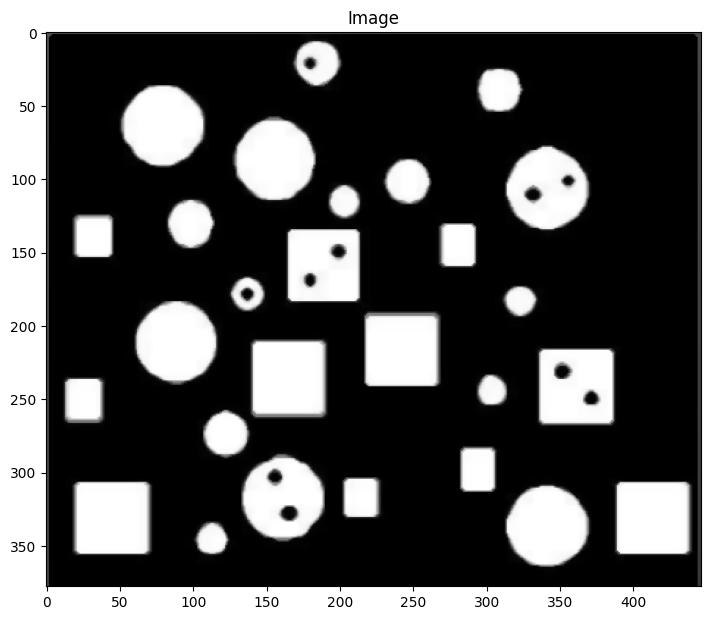

In [ ]:
imshow(image=blur)

In [ ]:
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

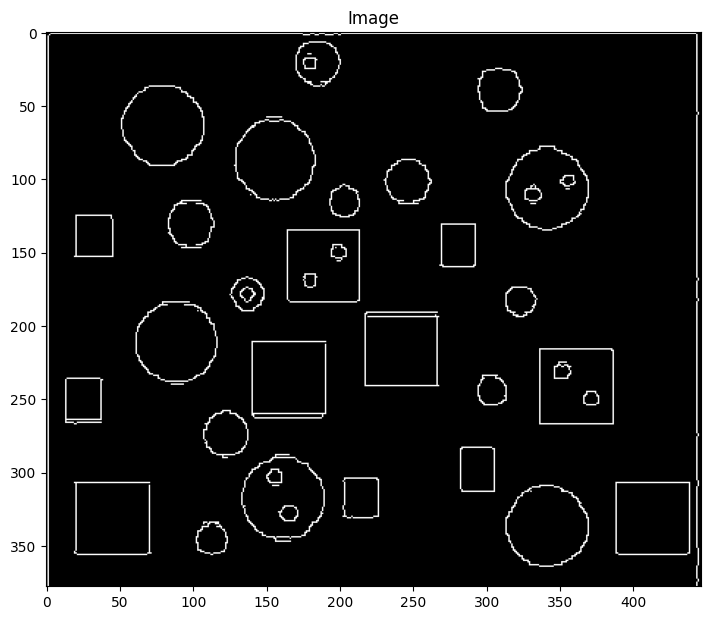

In [ ]:
imshow(image=edges)

In [ ]:
blur = cv2.medianBlur(edges, 1)

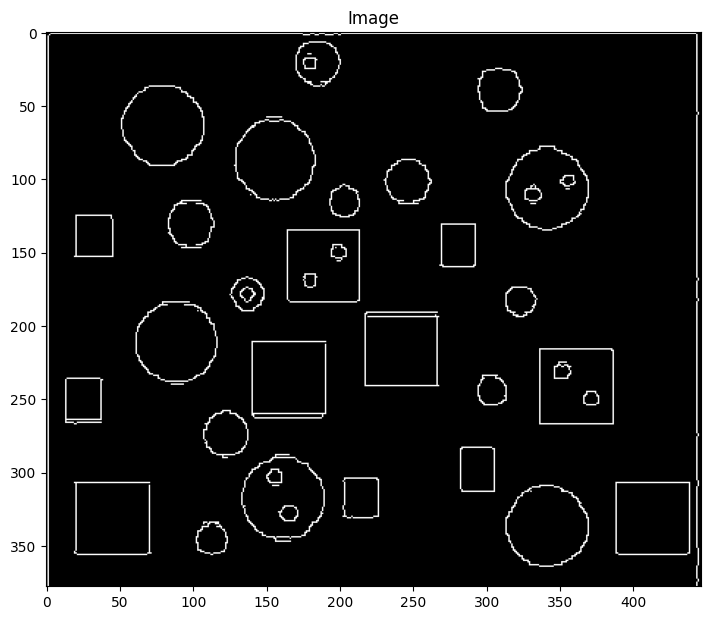

In [ ]:
imshow(image=blur)

In [ ]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 30, param1=150, param2=26, minRadius=1, maxRadius=100)


In [ ]:
circles

array([[[160.5, 316.5,  28. ],
        [339.5, 335.5,  27.5],
        [ 87.5, 212.5,  27.1],
        [156.5,  86.5,  26.6],
        [ 78.5,  62.5,  27.7],
        [174.5, 217.5,  44. ],
        [185.5,  20.5,  14.7],
        [187.5, 160.5,  26.3],
        [343.5, 107.5,  28.2],
        [ 99.5, 130.5,  17.4],
        [247.5, 100.5,  14.9],
        [302.5, 244.5,  10. ],
        [135.5, 177.5,  10.3]]], dtype=float32)

In [ ]:
img = cv2.imread('/content/circle1.png')
for i in circles[0, :]:
    cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)

As shown below the results are insignificant however it was asked to detect using this method 

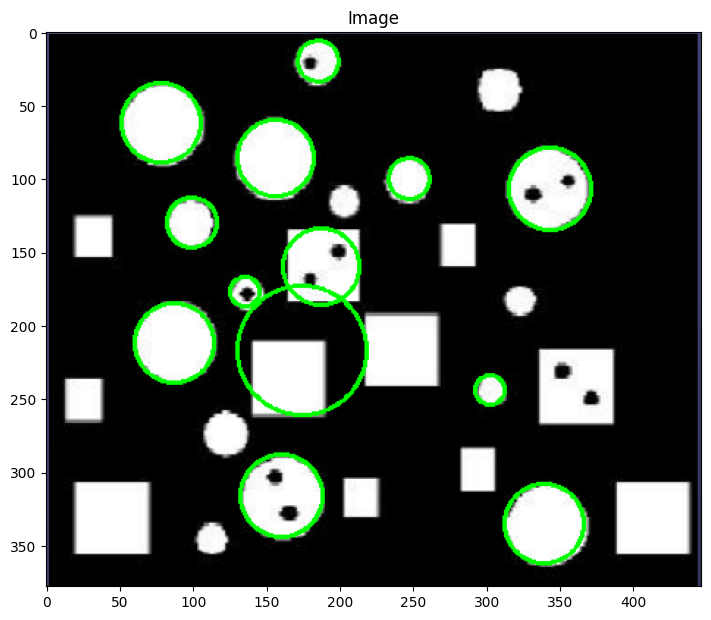

In [ ]:
imshow(image=img)

# Alternative Approach : Contours 
Using 

```
cv2.findContours
```
methon we can leverage more precision here is the approach that i took:

1. Read the input
2. Convert to grayscale
3. Threshold
4. Get external contours
5. Filter the contours to keep only those with  perimeters with number of sides greater than 4
Then draw them on a copy of the input
6. Also fit an ellipse to the circle contours and get the centers, diameters, and compute the radius from the diameters
7. Save the results

### Finding the ones with circles inside 
after saving the coordinates of circles and their respective Radiuses we use it to extract ROI (regions of Interest ) this helps increase are precision and sort of serves as post processing step in our approach 

after that we leverage 


```
cv2.SimpleBlobDetector()
```
to detect the blobs inside the ROI with both default parameters and circles only tuned parameters 
this serves to increase our precision in detection the circles inside the objects and yields to better results 


# 1 center: 112 345 radius: 20.0 diameters: 19 20
# 2 center: 341 336 radius: 54.0 diameters: 54 54
# 3 center: 160 317 radius: 54.0 diameters: 54 55
# 4 center: 122 274 radius: 29.0 diameters: 29 29
# 5 center: 303 244 radius: 20.0 diameters: 18 21
# 6 center: 88 211 radius: 54.0 diameters: 54 54
# 7 center: 322 183 radius: 19.0 diameters: 19 19
# 8 center: 136 178 radius: 20.0 diameters: 20 21
# 9 center: 98 130 radius: 30.0 diameters: 29 31
# 10 center: 202 115 radius: 20.0 diameters: 19 20
# 11 center: 246 101 radius: 29.0 diameters: 28 29
# 12 center: 341 106 radius: 54.0 diameters: 53 54
# 13 center: 155 87 radius: 53.0 diameters: 52 54
# 14 center: 79 63 radius: 54.0 diameters: 53 54
# 15 center: 308 39 radius: 29.0 diameters: 28 30
# 16 center: 184 20 radius: 29.0 diameters: 28 29


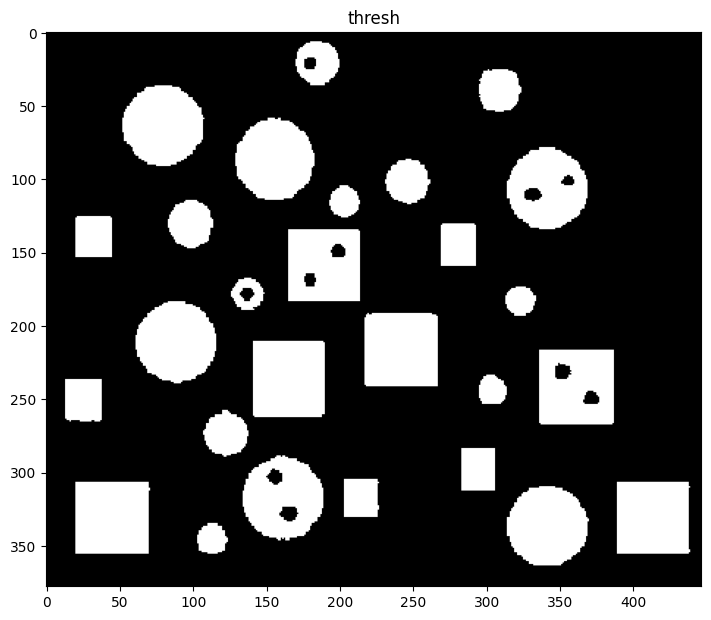

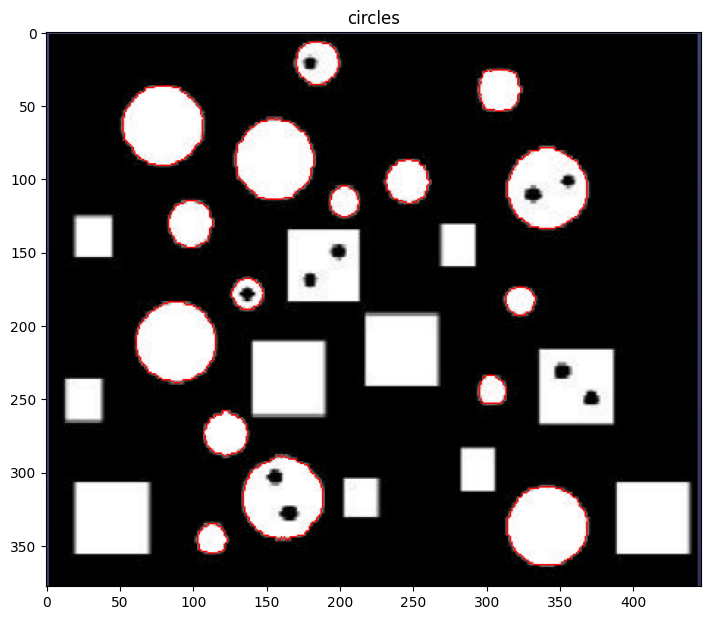

-1

In [ ]:
import cv2
import numpy as np

# read the image
img = cv2.imread('/content/circle1.png')
h, w = img.shape[:2]

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
tval, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#print(tval)

# get external contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
circles = []
# Draw polygons with sides >4
circle_img = img.copy()
i = 1
circles_ = []
for c in cnts:
    peri = cv2.arcLength(c, True)
    # get approximate polygon and number of vertices (len)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) > 4:
        #print(len(approx))
        cv2.drawContours(circle_img, [c], -1, (0,0,255), 1)
        (xc,yc),(d1,d2),angle = cv2.fitEllipse(c)
        xc = int(xc)
        yc = int(yc)
        rad = (d1+d2)//2
        circles_.append([xc,yc,rad])
        d1 = int(d1)
        d2 = int(d2)
        print("#", i, "center:", xc,yc, "radius:", rad, "diameters:", d1,d2)
        i = i + 1

# save results
cv2.imwrite('circles_squares_circles.png', circle_img)

# show results
imshow('thresh', thresh)
imshow('circles', circle_img)
cv2.waitKey(0)

# 1 center: 112 345 radius: 20.0 diameters: 19 20
# 2 center: 341 336 radius: 54.0 diameters: 54 54
# 3 center: 160 317 radius: 54.0 diameters: 54 55
# 4 center: 122 274 radius: 29.0 diameters: 29 29
# 5 center: 303 244 radius: 20.0 diameters: 18 21
# 6 center: 88 211 radius: 54.0 diameters: 54 54
# 7 center: 322 183 radius: 19.0 diameters: 19 19
# 8 center: 136 178 radius: 20.0 diameters: 20 21
# 9 center: 98 130 radius: 30.0 diameters: 29 31
# 10 center: 202 115 radius: 20.0 diameters: 19 20
# 11 center: 246 101 radius: 29.0 diameters: 28 29
# 12 center: 341 106 radius: 54.0 diameters: 53 54
# 13 center: 155 87 radius: 53.0 diameters: 52 54
# 14 center: 79 63 radius: 54.0 diameters: 53 54
# 15 center: 308 39 radius: 29.0 diameters: 28 30
# 16 center: 184 20 radius: 29.0 diameters: 28 29


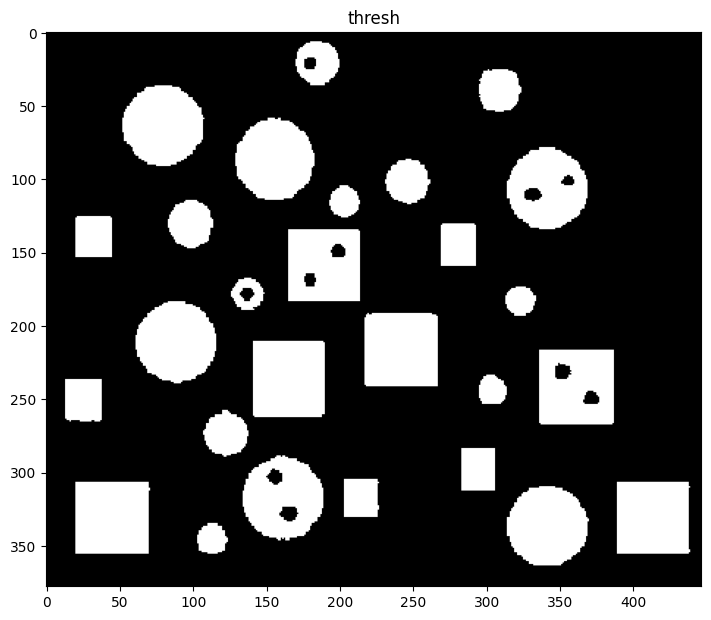

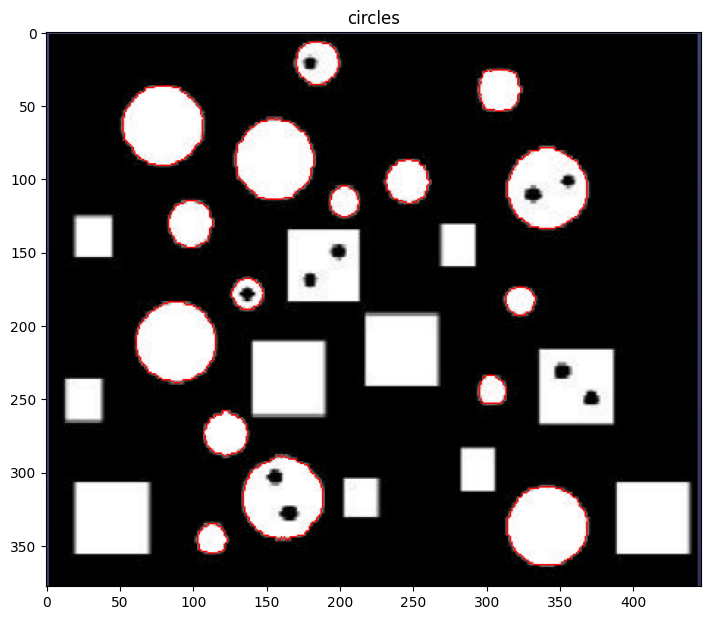

-1

In [ ]:
import cv2
import numpy as np

# read the image
img = cv2.imread('/content/circle1.png')
h, w = img.shape[:2]

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
tval, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#print(tval)

# get external contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
circles = []
# Draw polygons with sides >4
circle_img = img.copy()
i = 1
circles_ = []
for c in cnts:
    peri = cv2.arcLength(c, True)
    # get approximate polygon and number of vertices (len)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) > 4:
        #print(len(approx))
        cv2.drawContours(circle_img, [c], -1, (0,0,255), 1)
        # mask = np.ones_like(circle_img)
        # mask = cv2.bitwise_and(mask,cv2.drawContours(circle_img, [c], -1, (255,255,255), 1))
        # imshow('test',image=mask)
        (xc,yc),(d1,d2),angle = cv2.fitEllipse(c)
        xc = int(xc)
        yc = int(yc)
        rad = (d1+d2)//2
        circles_.append([xc,yc,rad])
        d1 = int(d1)
        d2 = int(d2)
        print("#", i, "center:", xc,yc, "radius:", rad, "diameters:", d1,d2)
        i = i + 1

# save results
cv2.imwrite('circles_squares_circles.png', circle_img)

# show results
imshow('thresh', thresh)
imshow('circles', circle_img)
cv2.waitKey(0)

In [ ]:
circles_

[[112, 345, 20.0],
 [341, 336, 54.0],
 [160, 317, 54.0],
 [122, 274, 29.0],
 [303, 244, 20.0],
 [88, 211, 54.0],
 [322, 183, 19.0],
 [136, 178, 20.0],
 [98, 130, 30.0],
 [202, 115, 20.0],
 [246, 101, 29.0],
 [341, 106, 54.0],
 [155, 87, 53.0],
 [79, 63, 54.0],
 [308, 39, 29.0],
 [184, 20, 29.0]]

In [ ]:
circles_[0]

[112, 345, 20.0]

In [ ]:
df = pd.DataFrame(circles_,
               columns=['X-cordinate','Y-cordinate','Radius'])

we calculate the areas as requested 

In [ ]:
df['Area'] = df['Radius'] * df['Radius'] * np.pi

In [ ]:
df

,X-cordinate,Y-cordinate,Radius,Area
0,112,345,20.0,1256.637061
1,341,336,54.0,9160.884178
2,160,317,54.0,9160.884178
3,122,274,29.0,2642.079422
4,303,244,20.0,1256.637061
5,88,211,54.0,9160.884178
6,322,183,19.0,1134.114948
7,136,178,20.0,1256.637061
8,98,130,30.0,2827.433388
9,202,115,20.0,1256.637061


### Extracting ROI

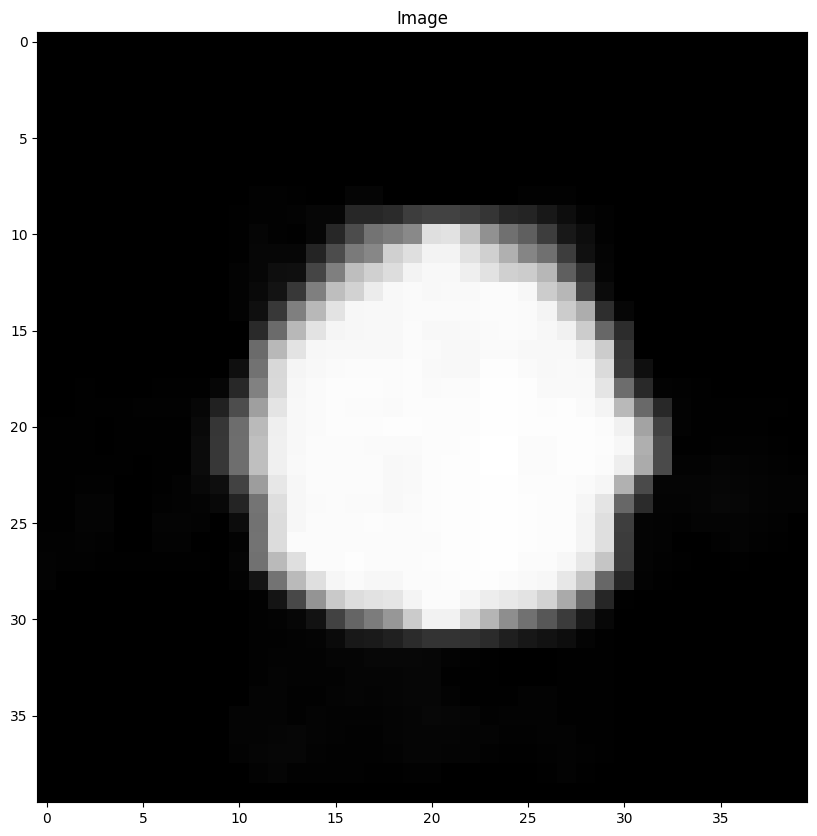

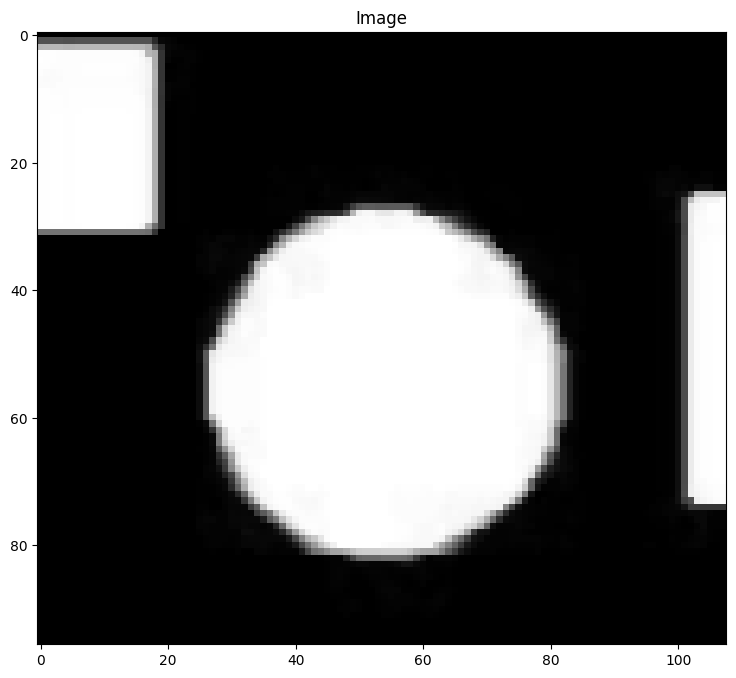

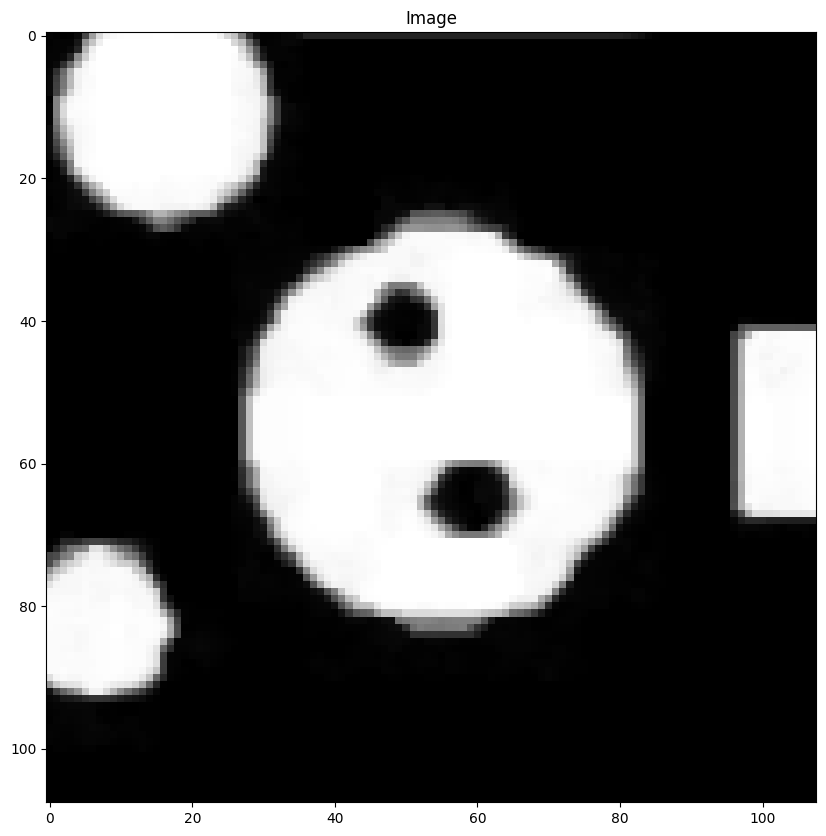

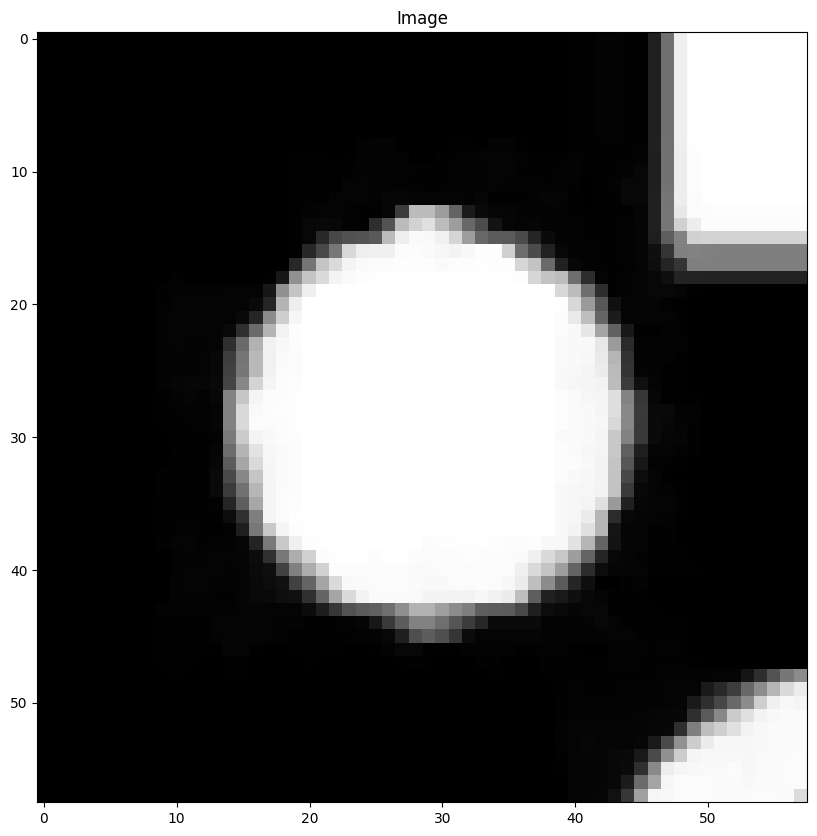

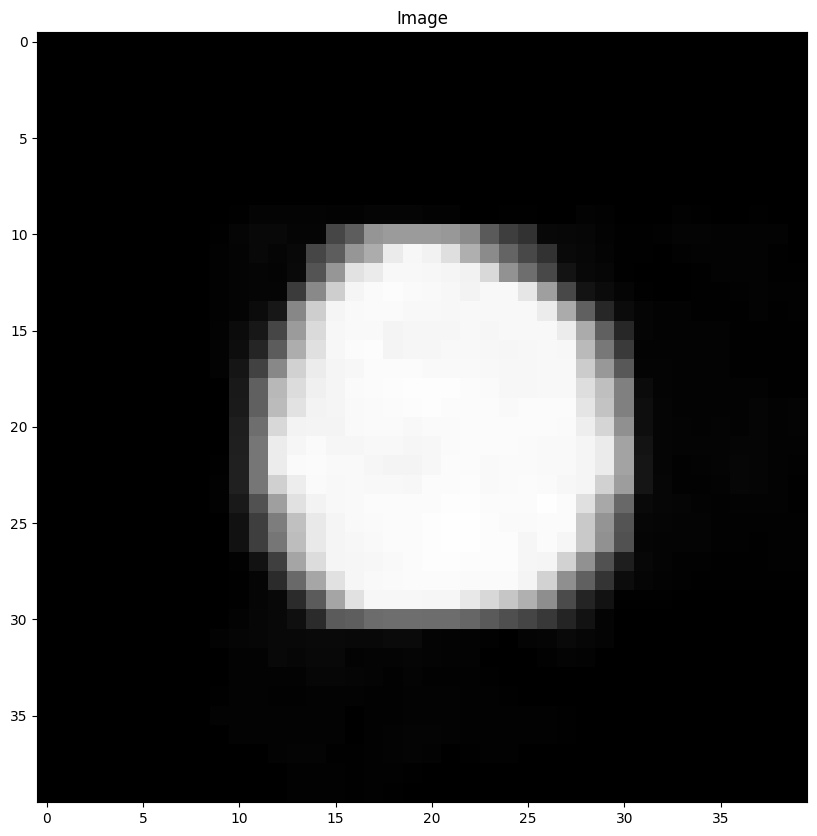

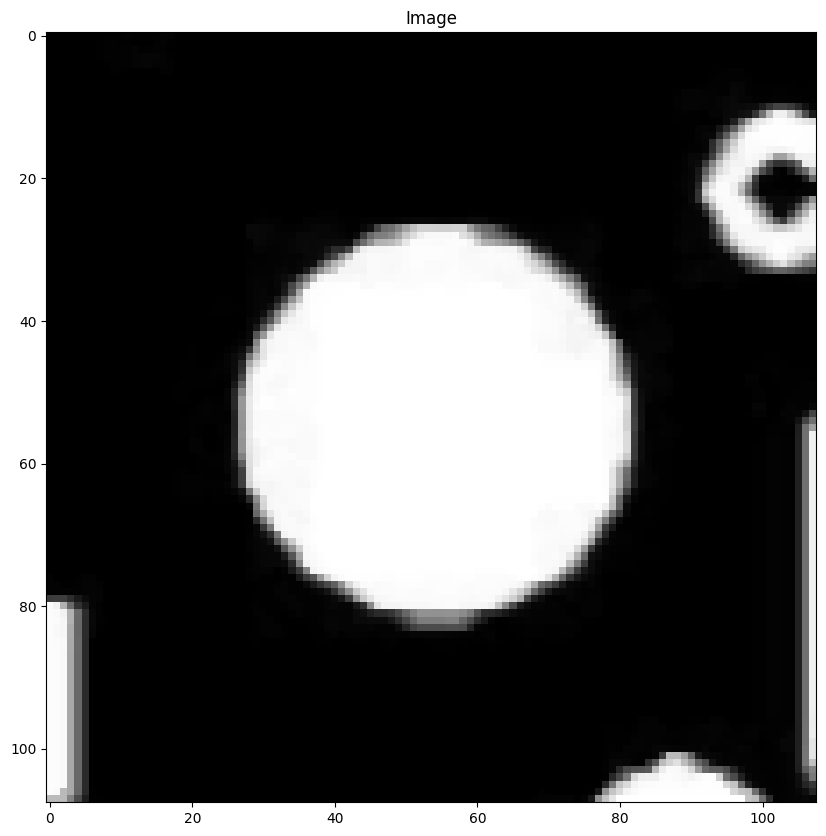

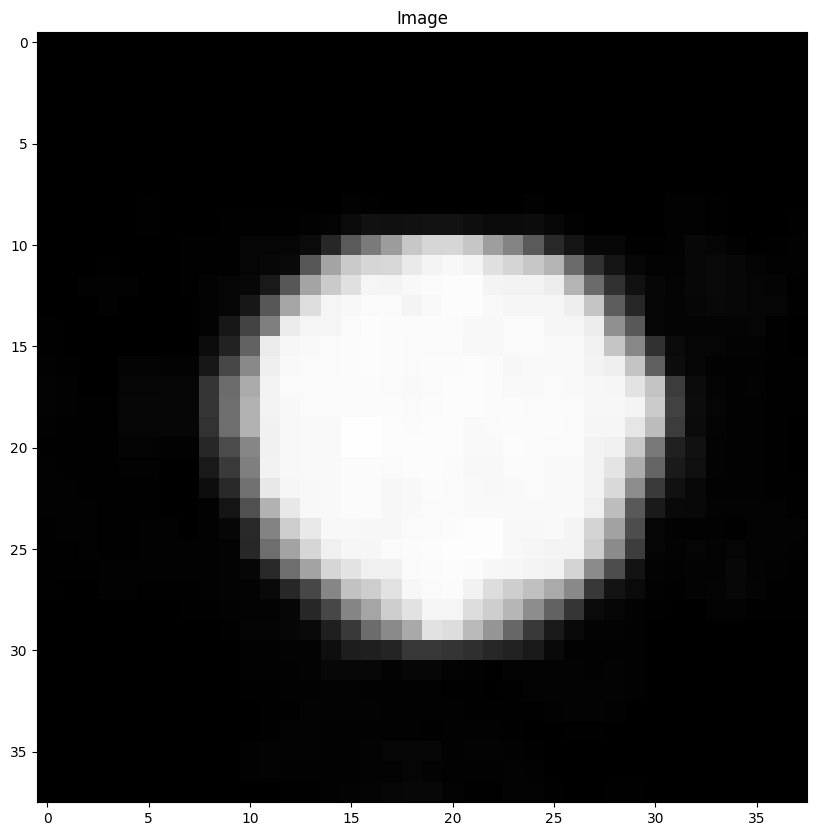

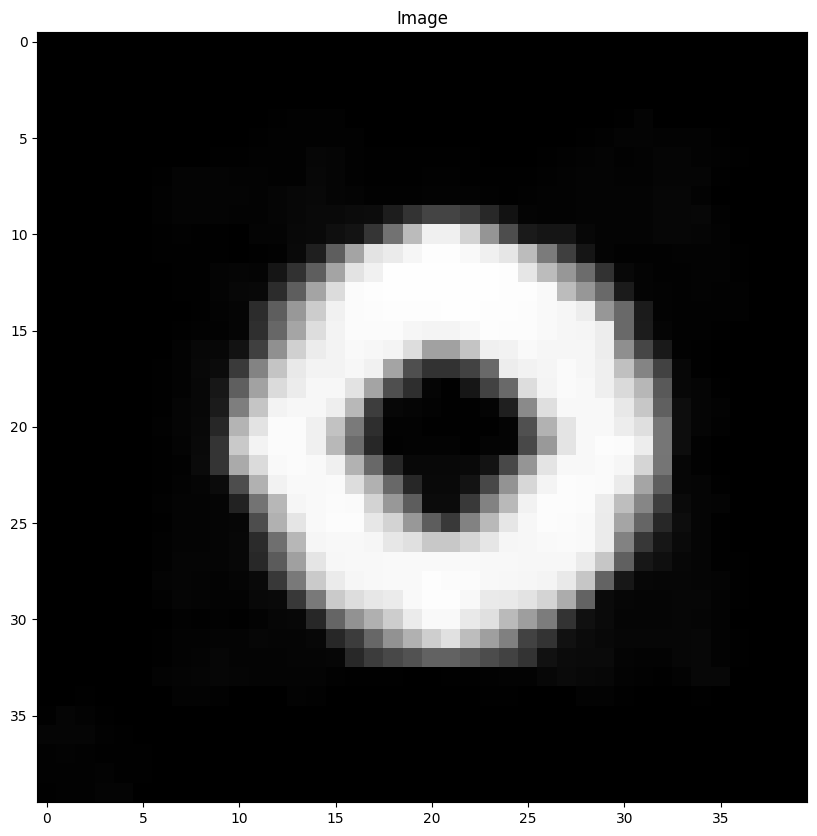

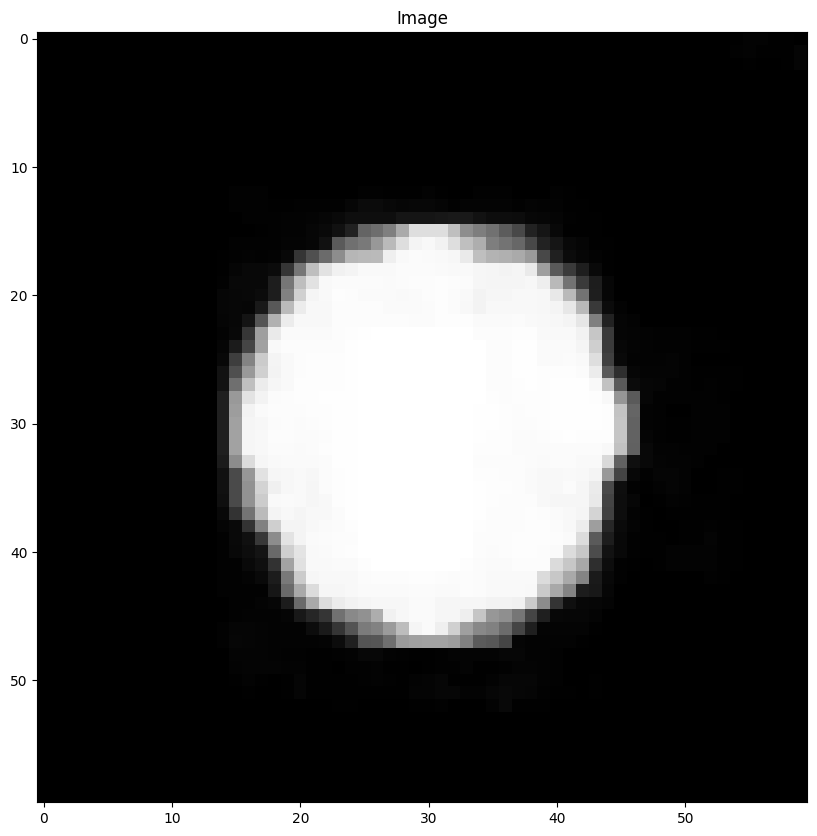

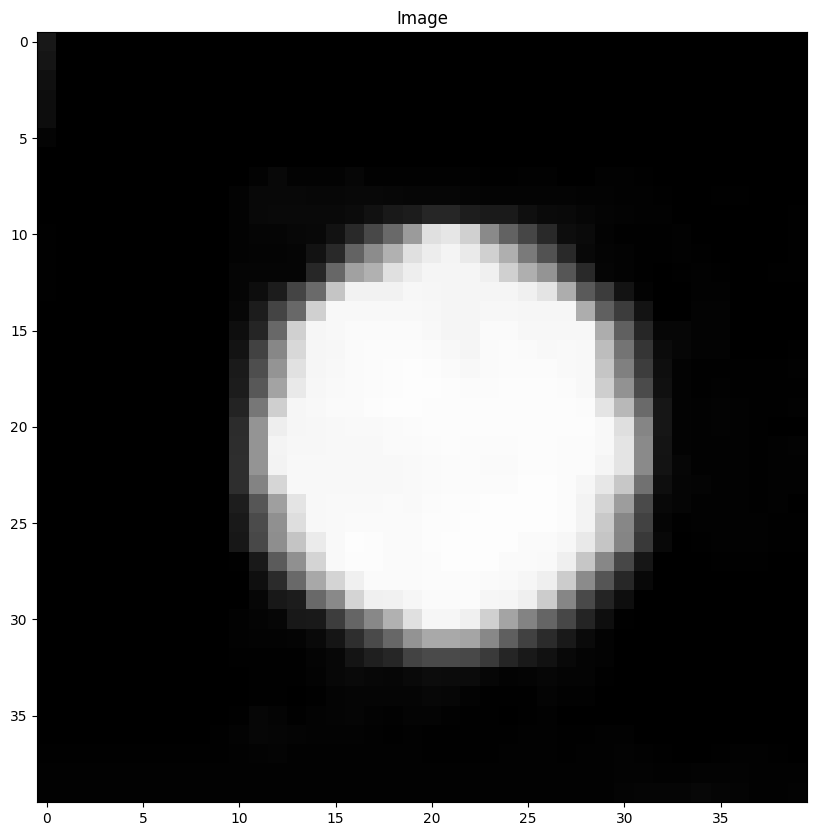

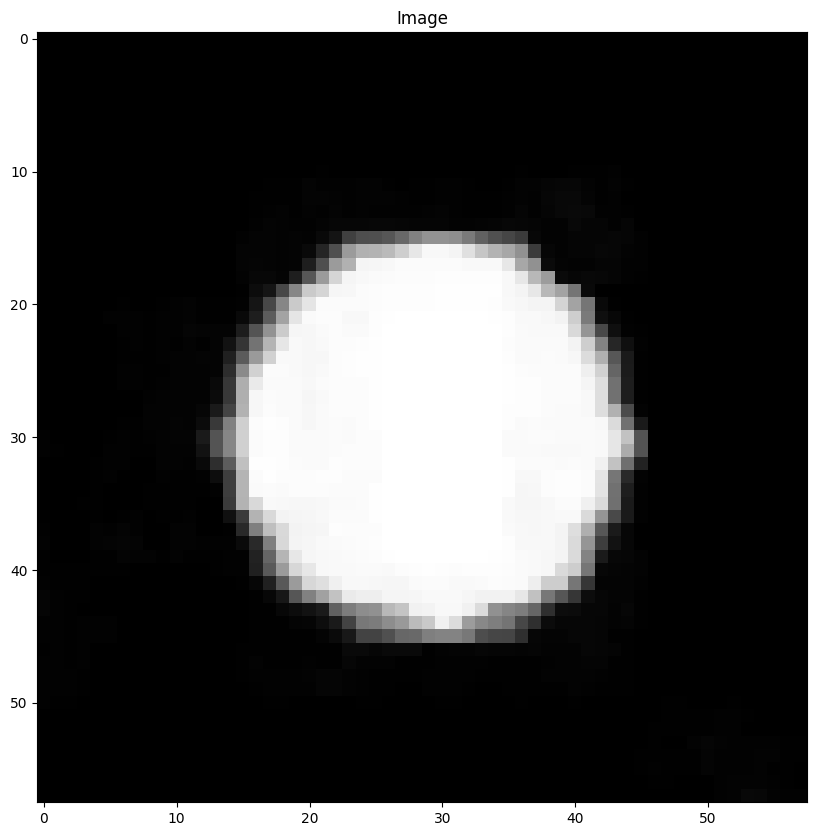

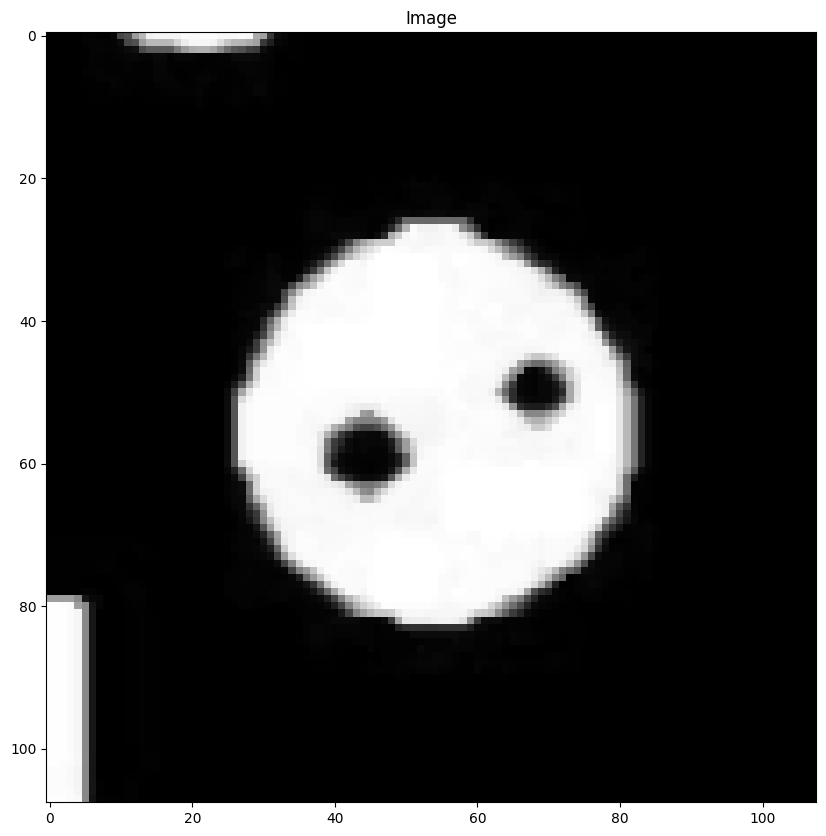

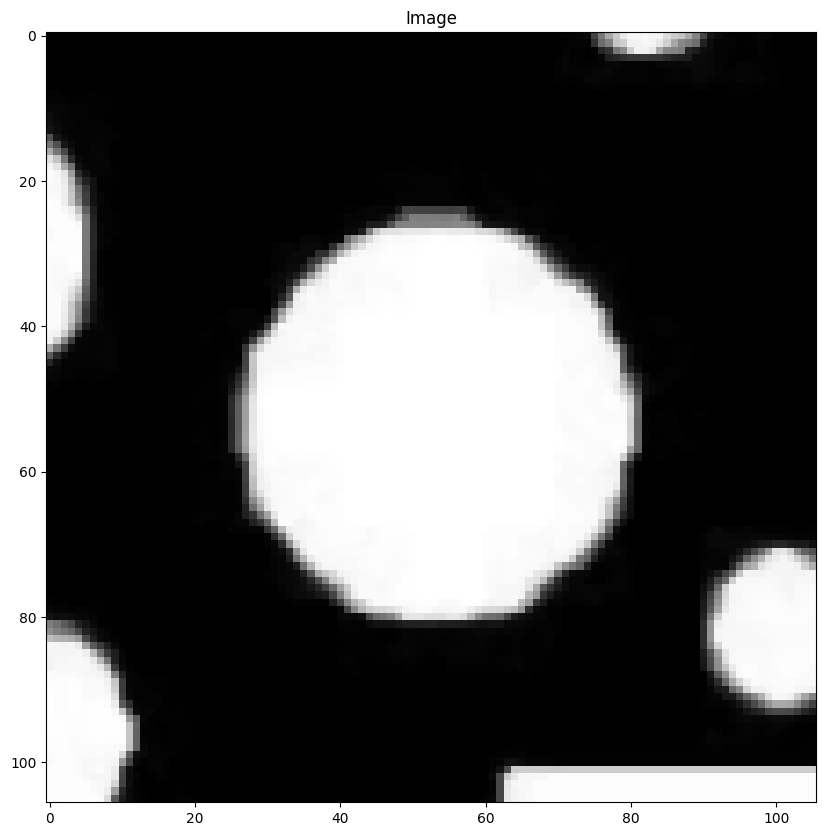

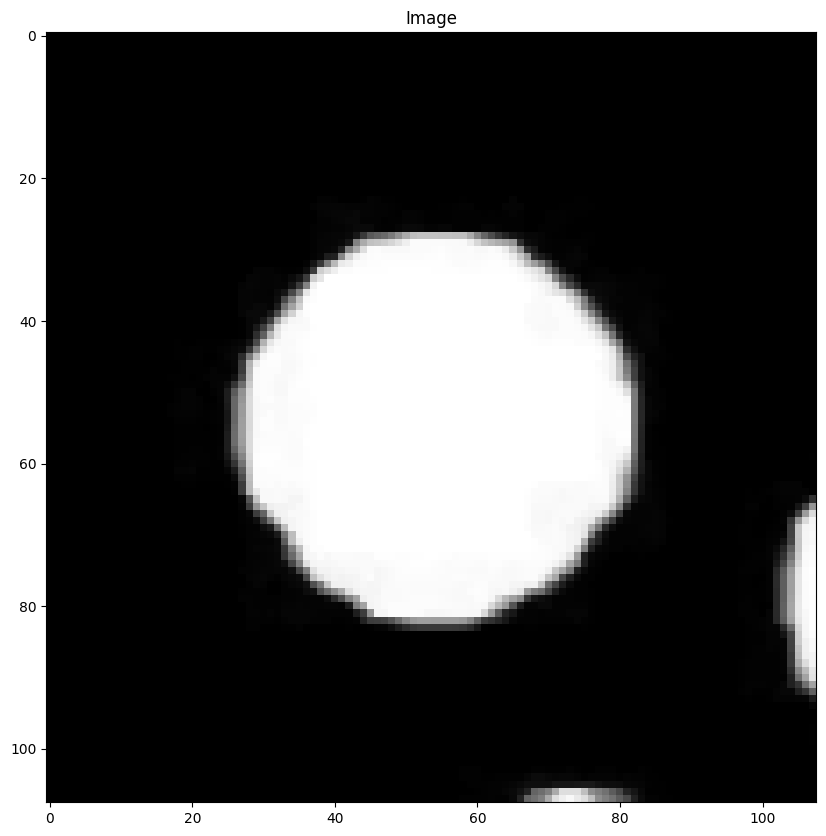

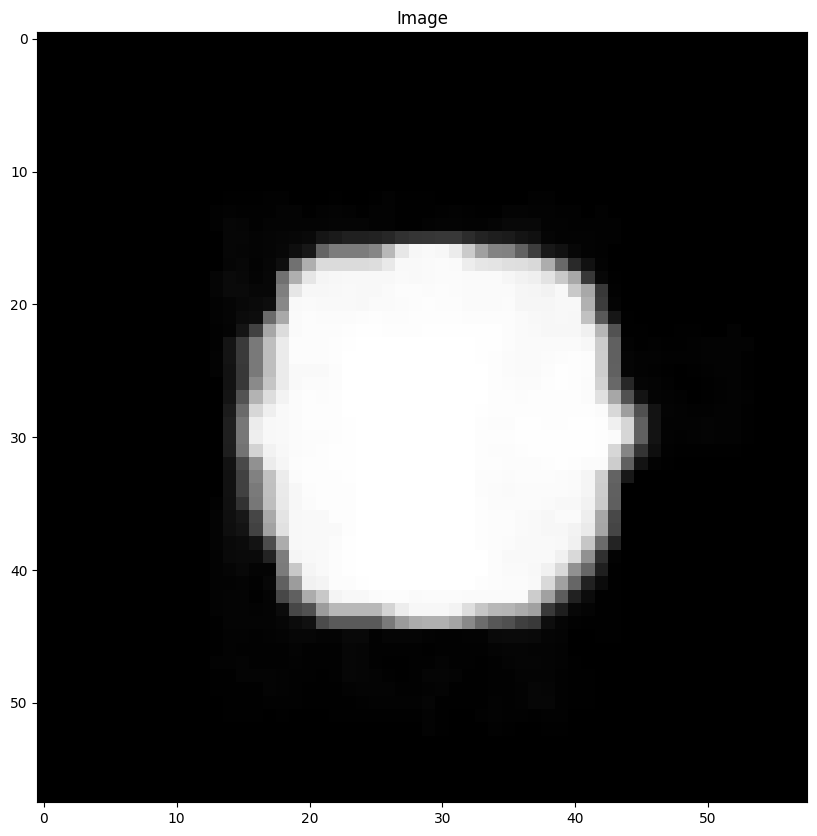

error: ignored

In [ ]:
temp = []
img = cv2.imread('/content/circle1.png')
for i in range(len(df)):
  y = int(df['Y-cordinate'].loc[i])
  x = int(df['X-cordinate'].loc[i])
  r = int(df['Radius'].loc[i])
  ROI = img[y-r:y+r,x-r:x+r]
  blured_ROI = cv2.medianBlur(ROI, 3)
  imshow(image=blured_ROI)
  temp.append(blured_ROI)
  

  

In [ ]:
len(temp)

15

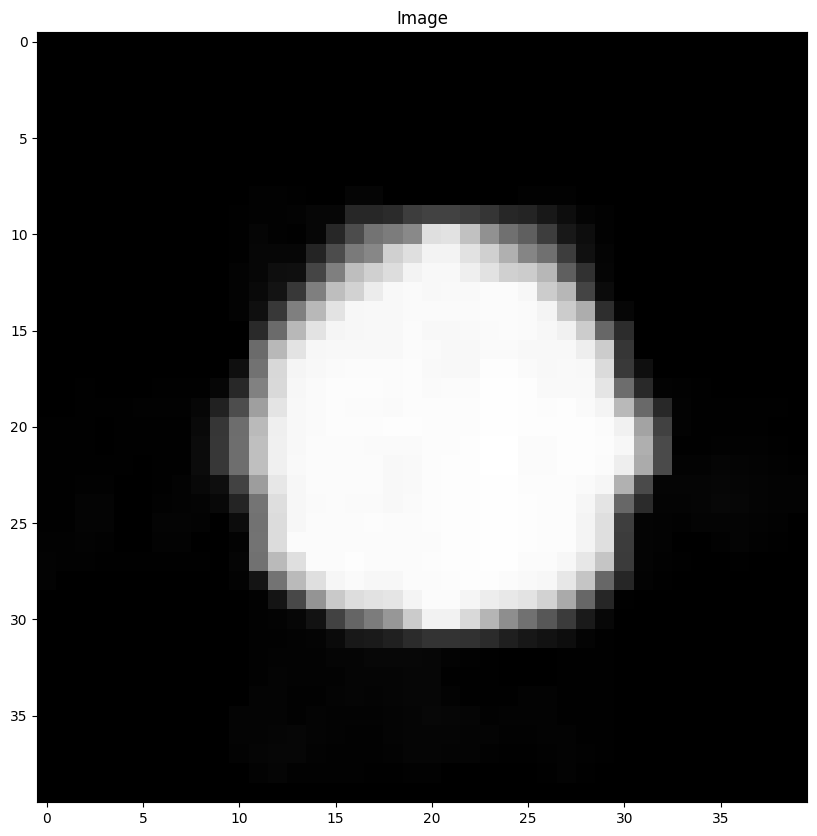

In [ ]:
test = temp[0]
imshow(image=test)

### Detecting Inner Circles

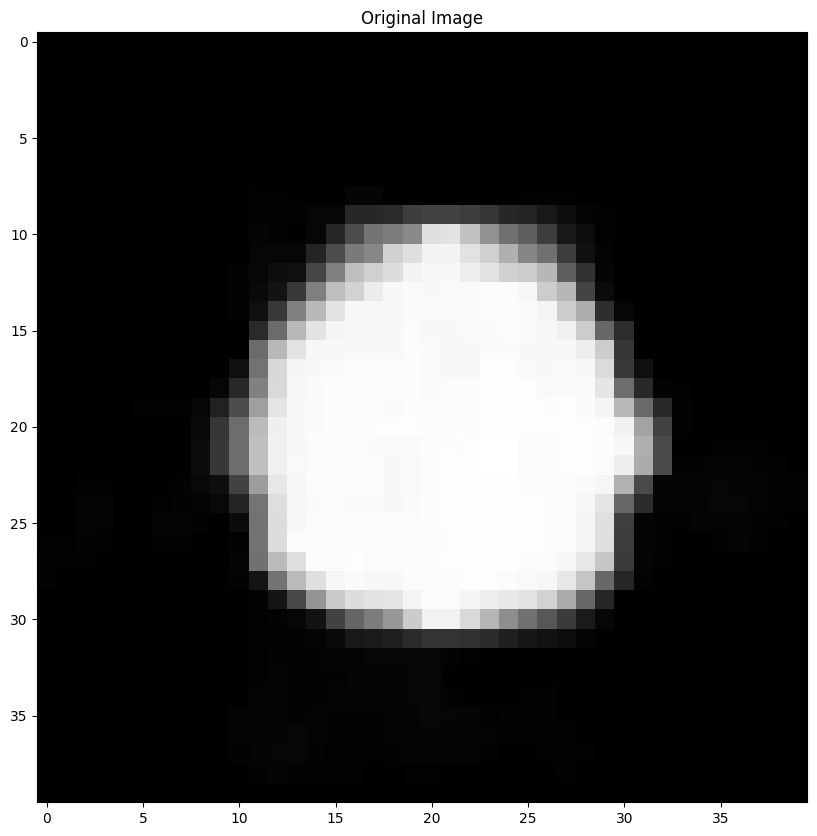

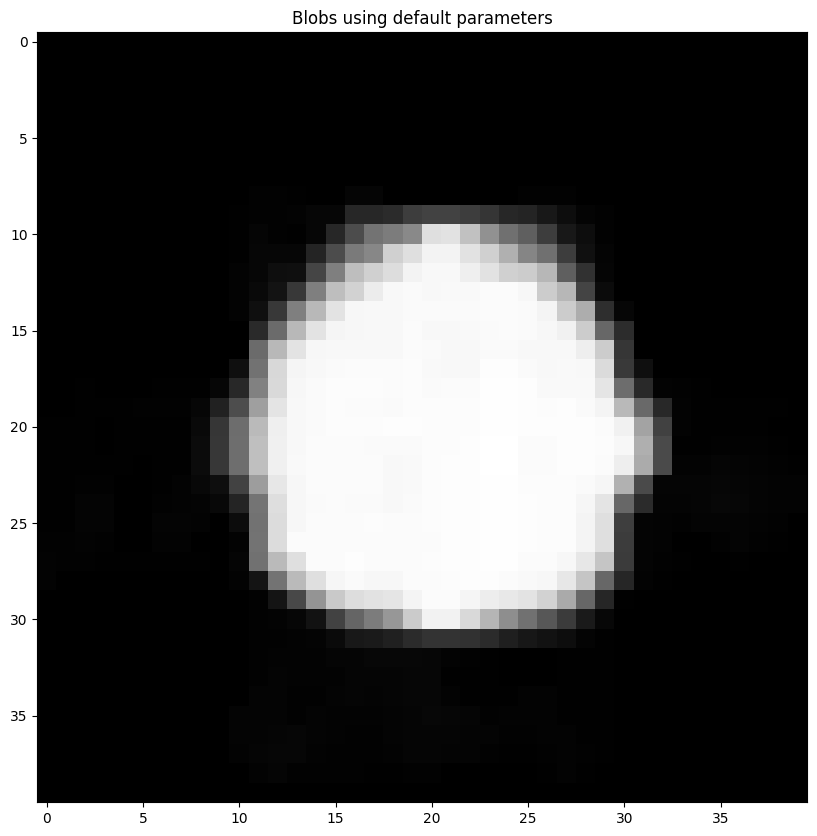

Number of Circular Blobs: 0


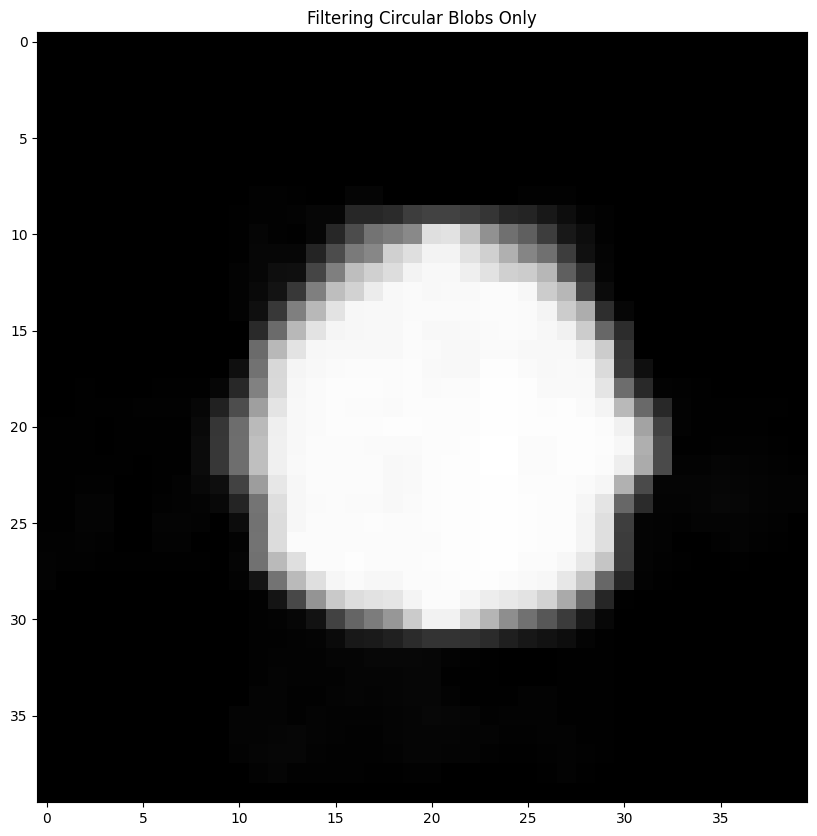

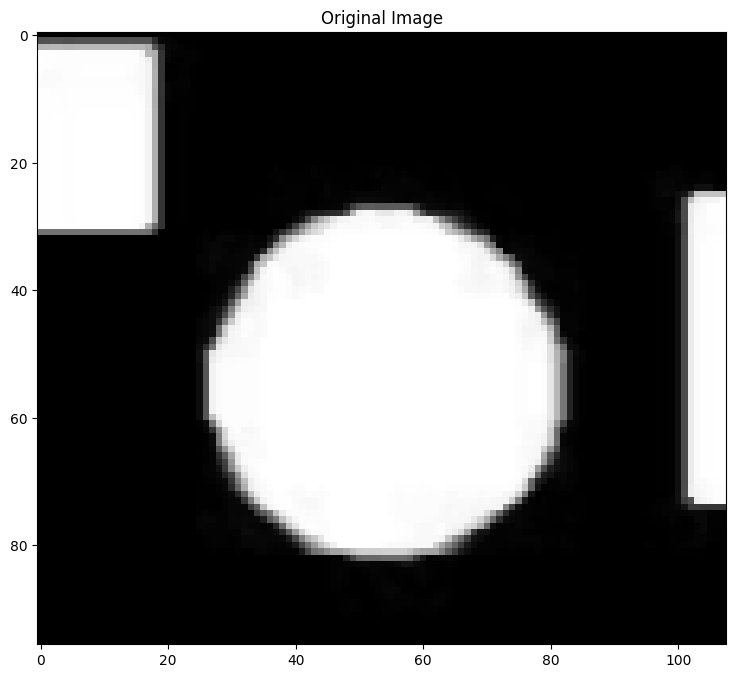

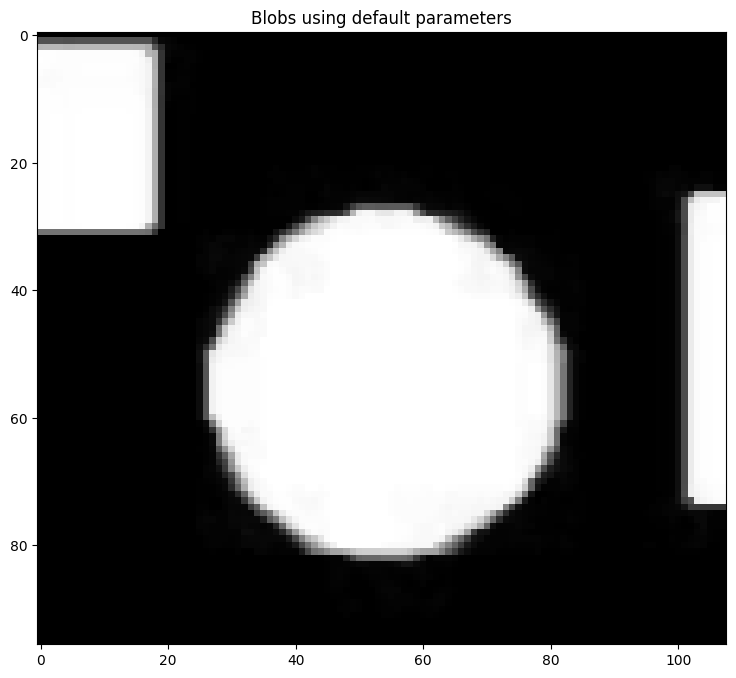

Number of Circular Blobs: 0


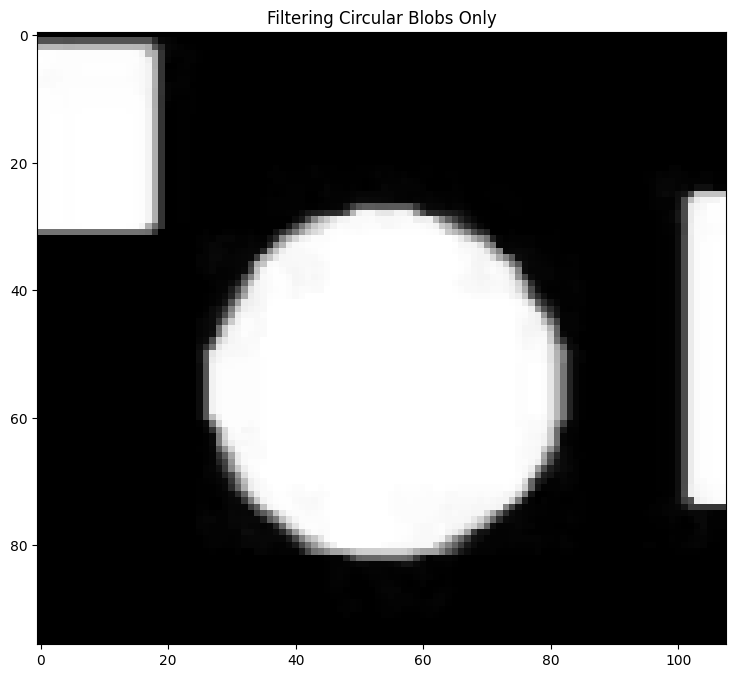

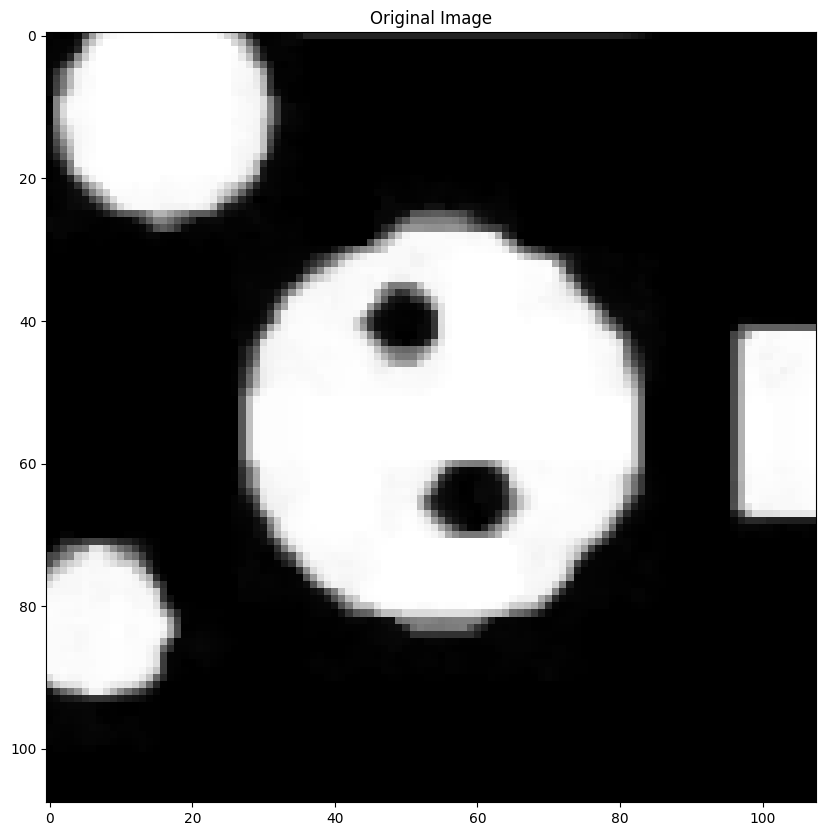

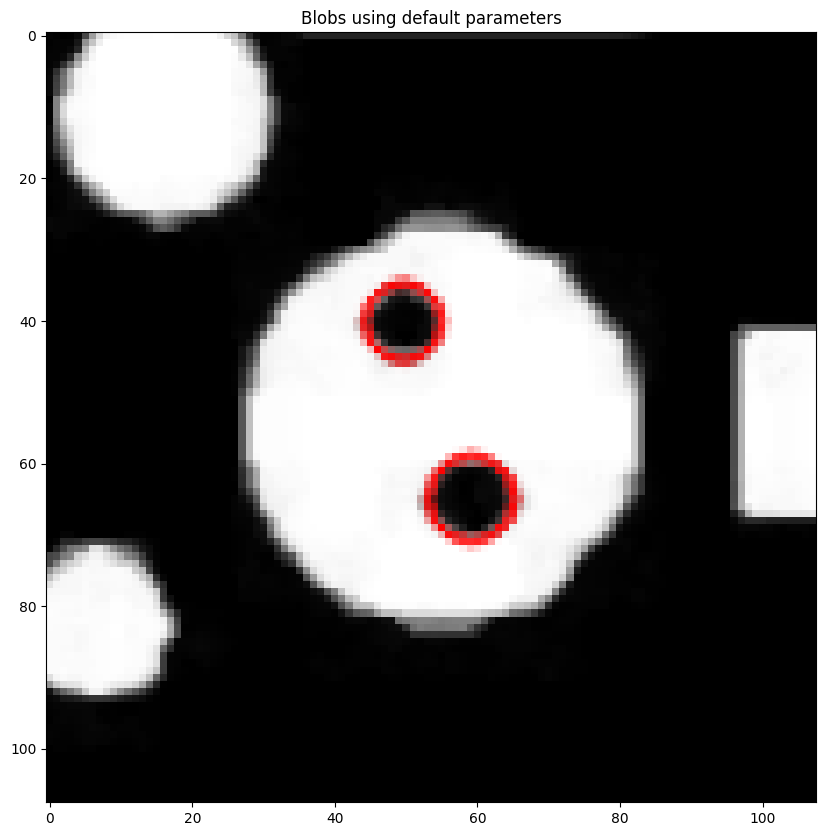

Number of Circular Blobs: 1


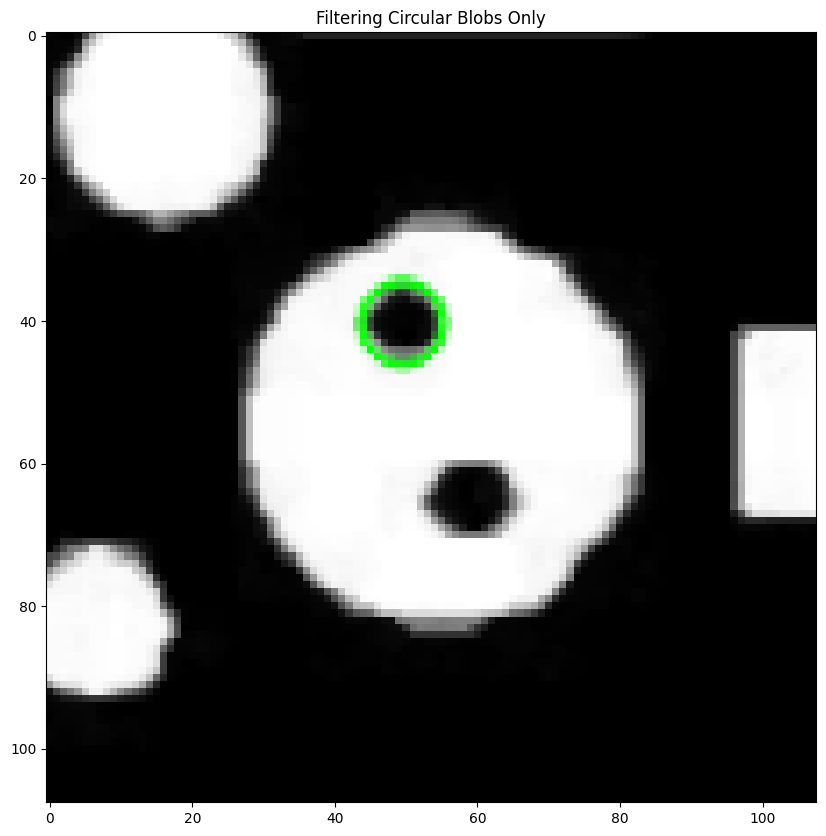

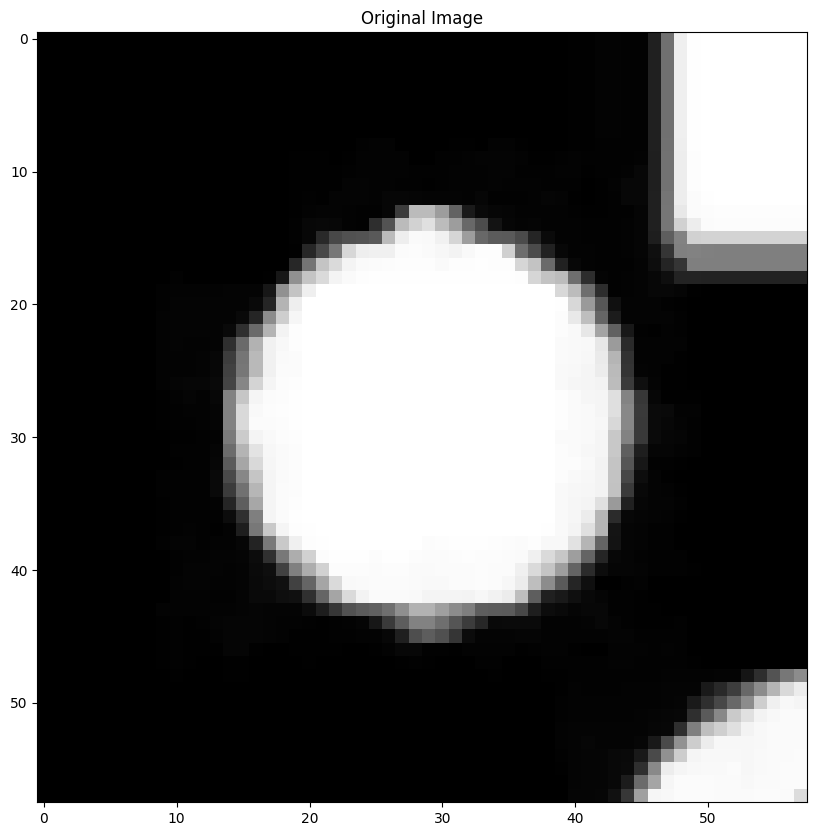

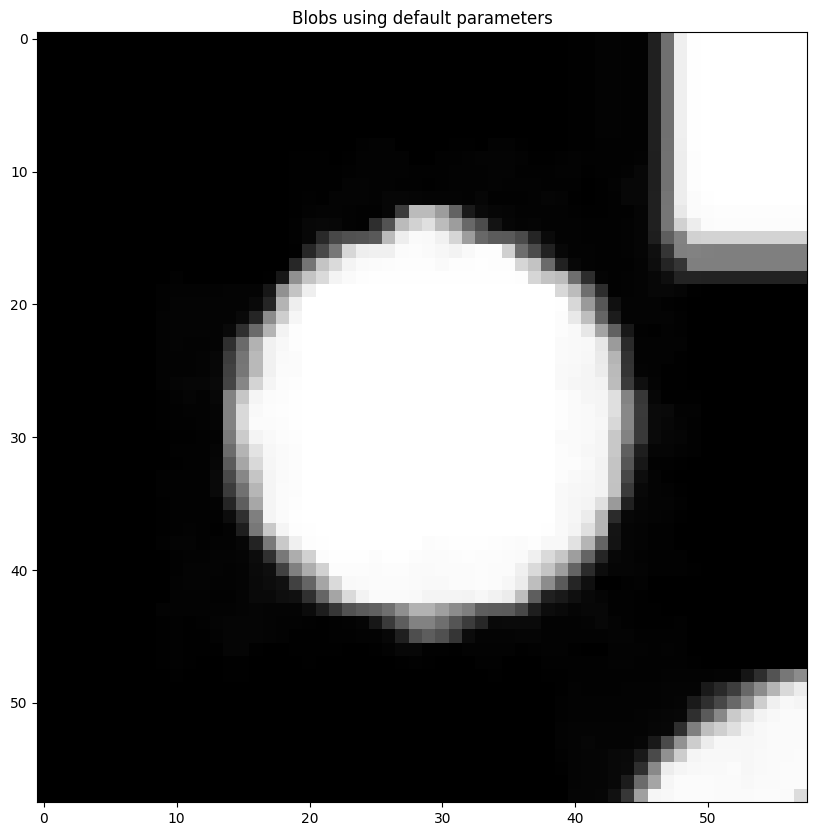

Number of Circular Blobs: 0


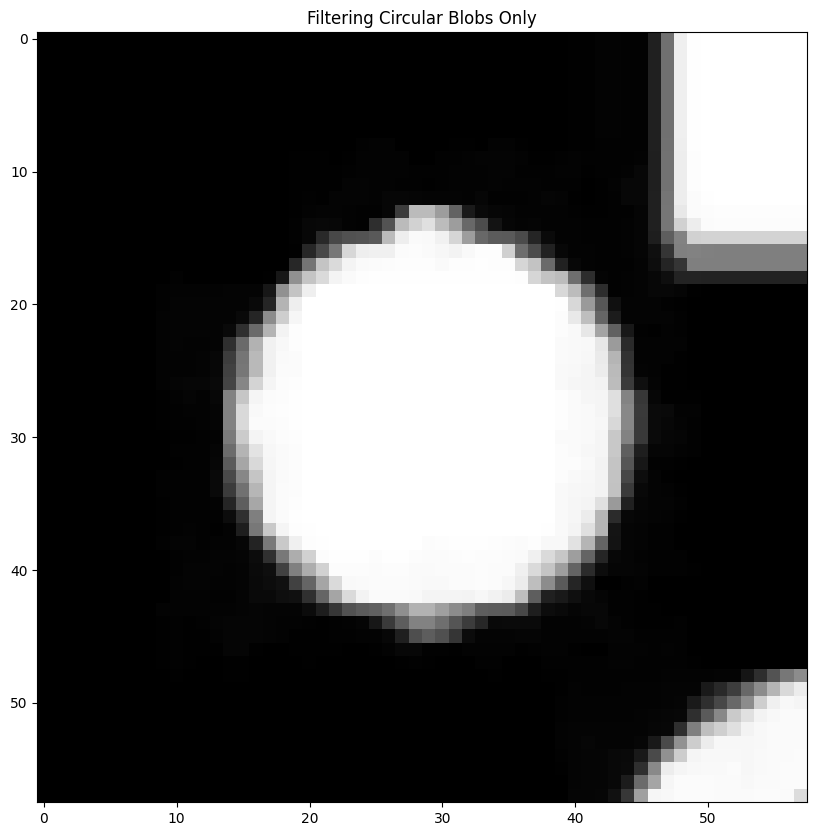

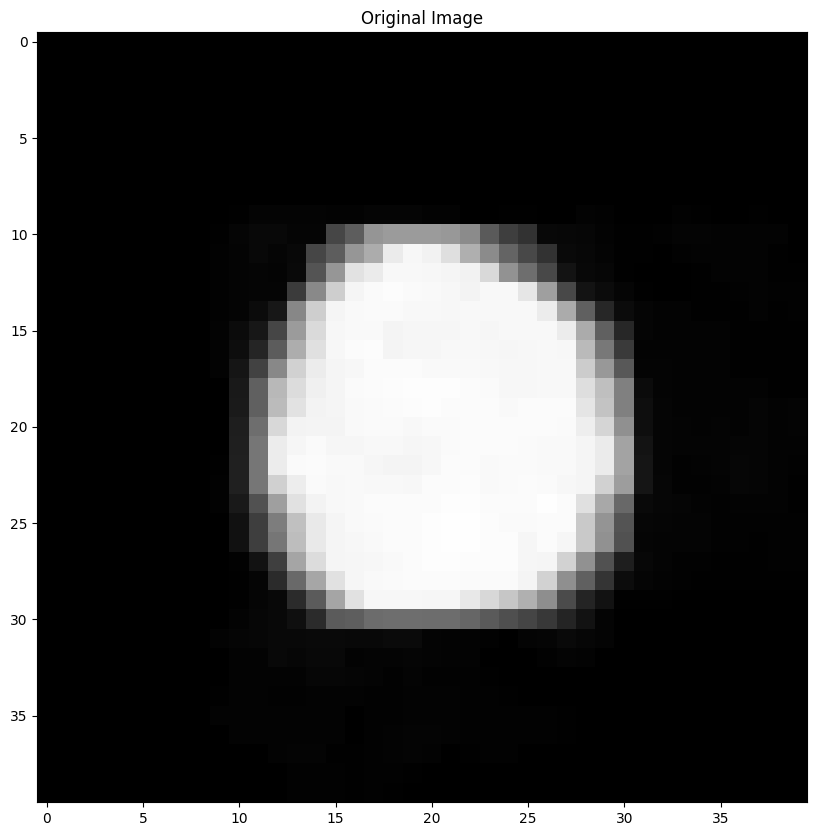

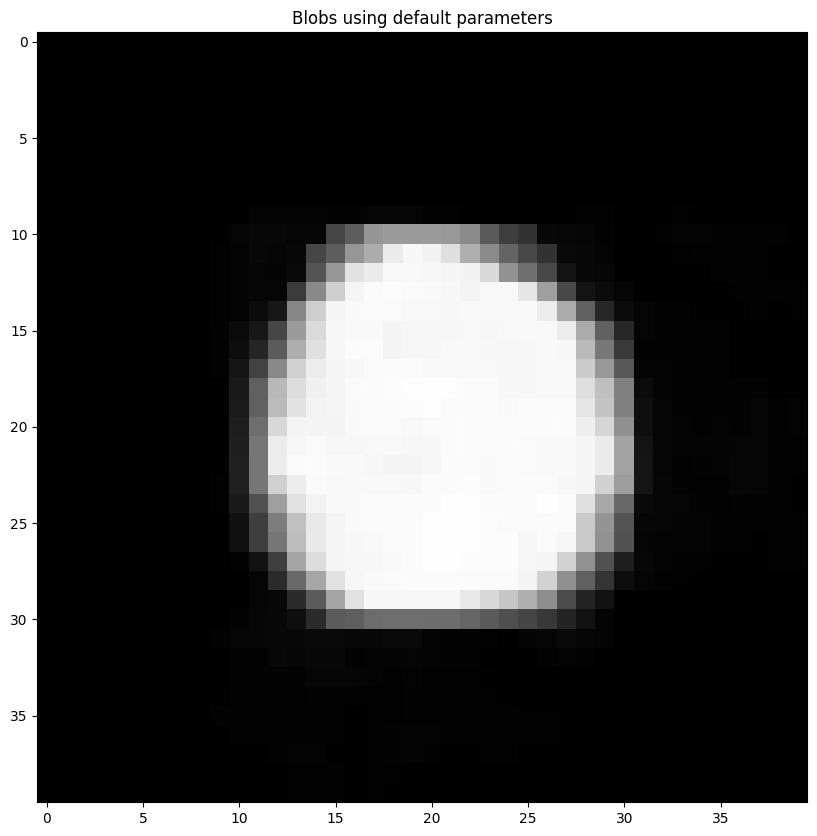

Number of Circular Blobs: 0


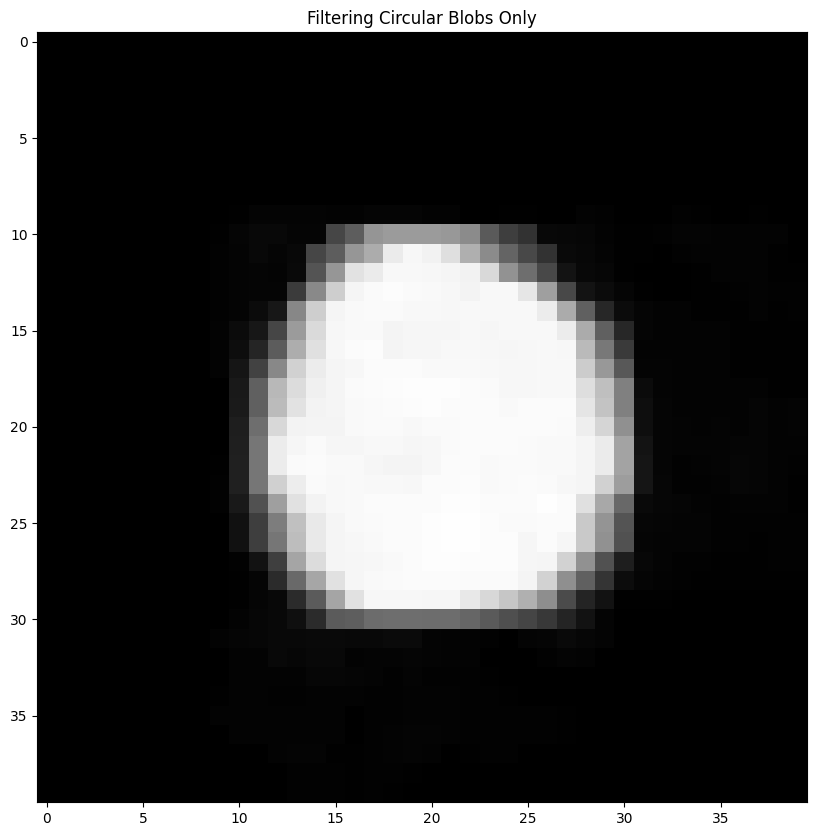

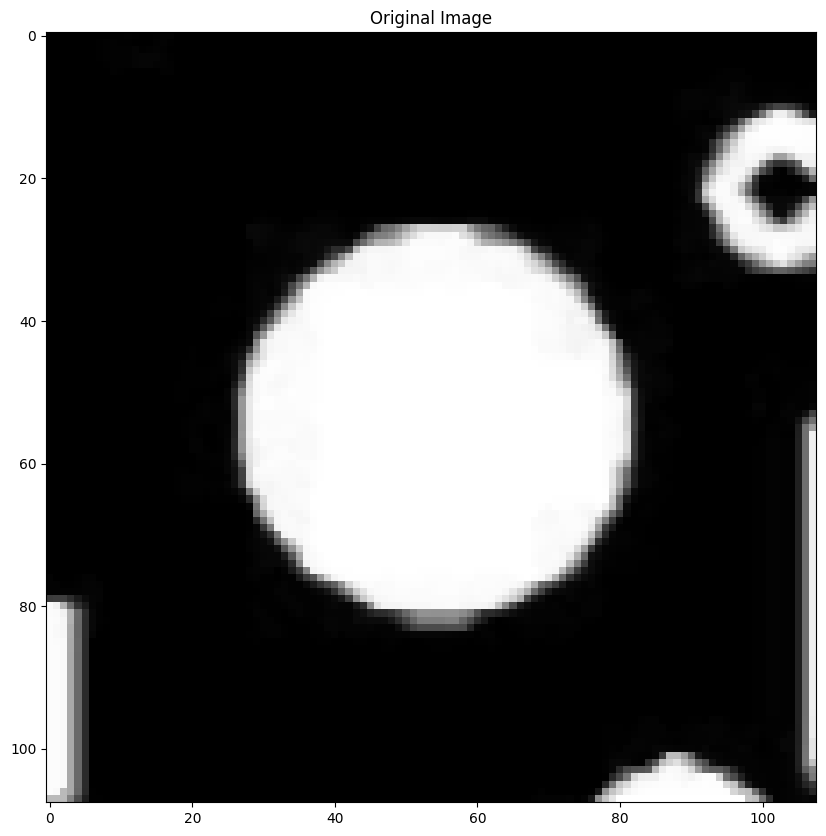

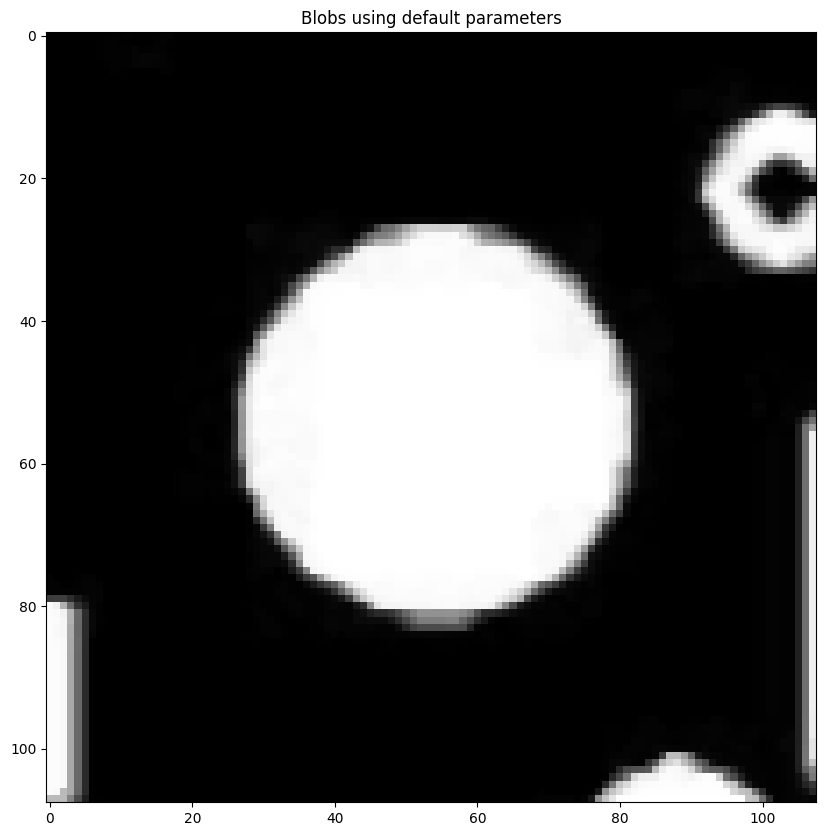

Number of Circular Blobs: 0


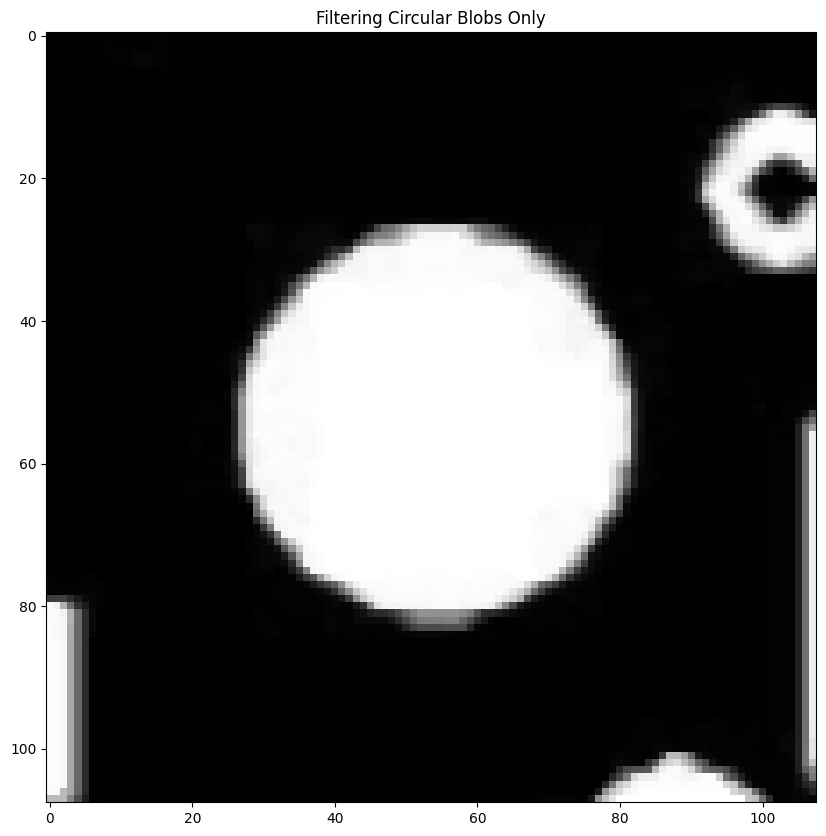

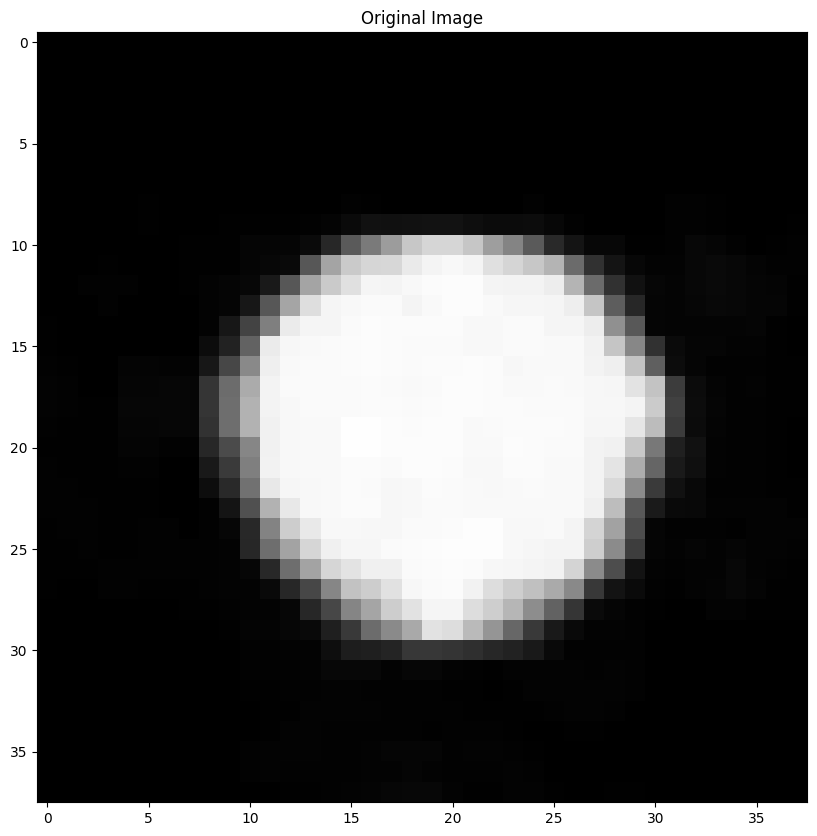

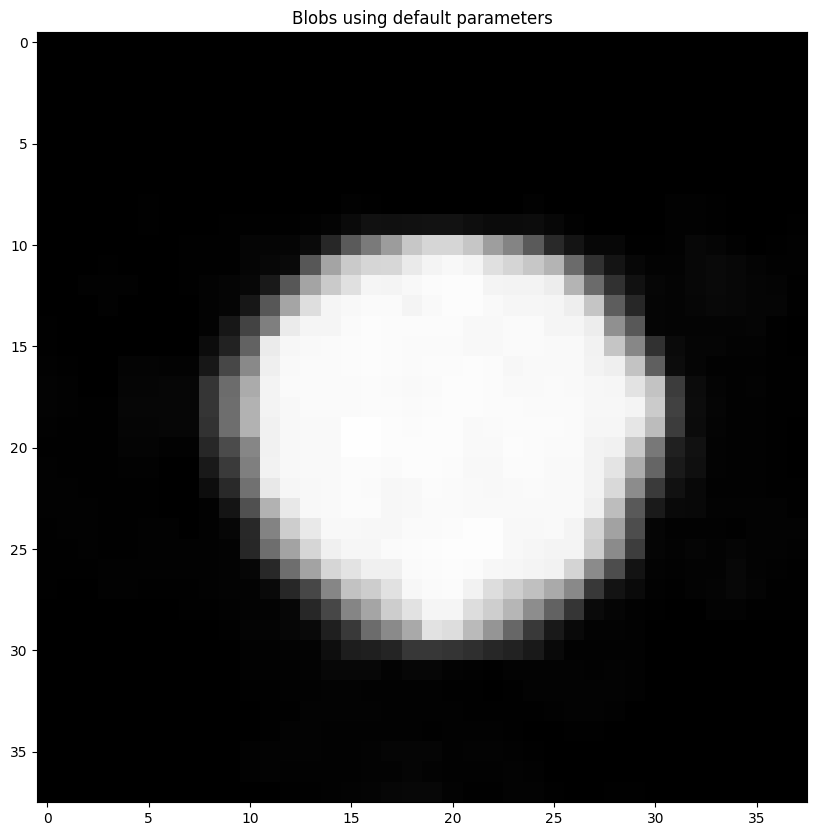

Number of Circular Blobs: 0


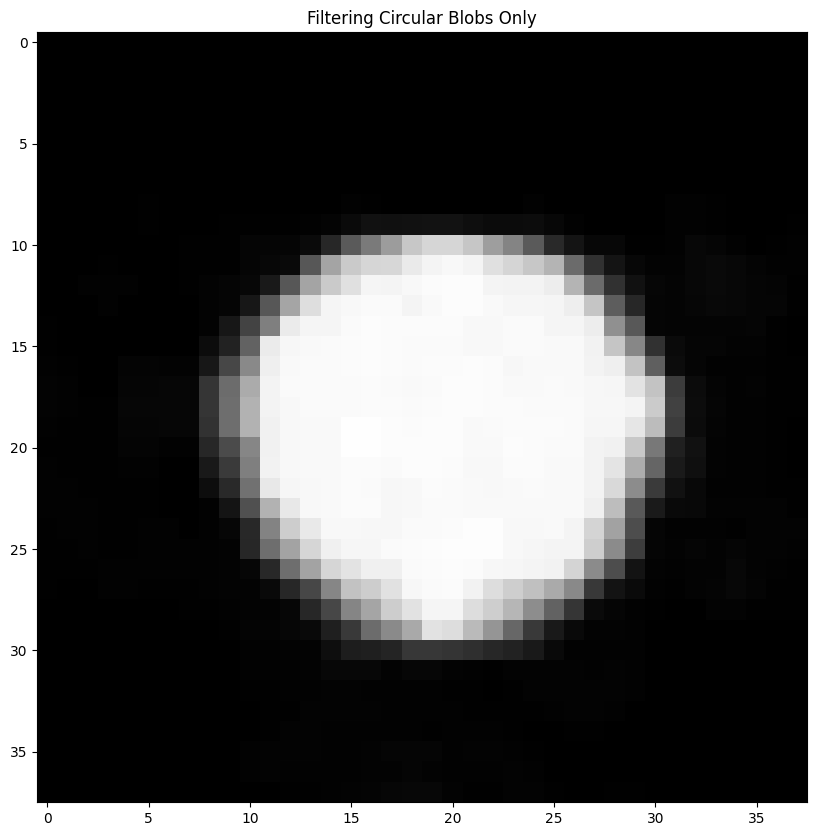

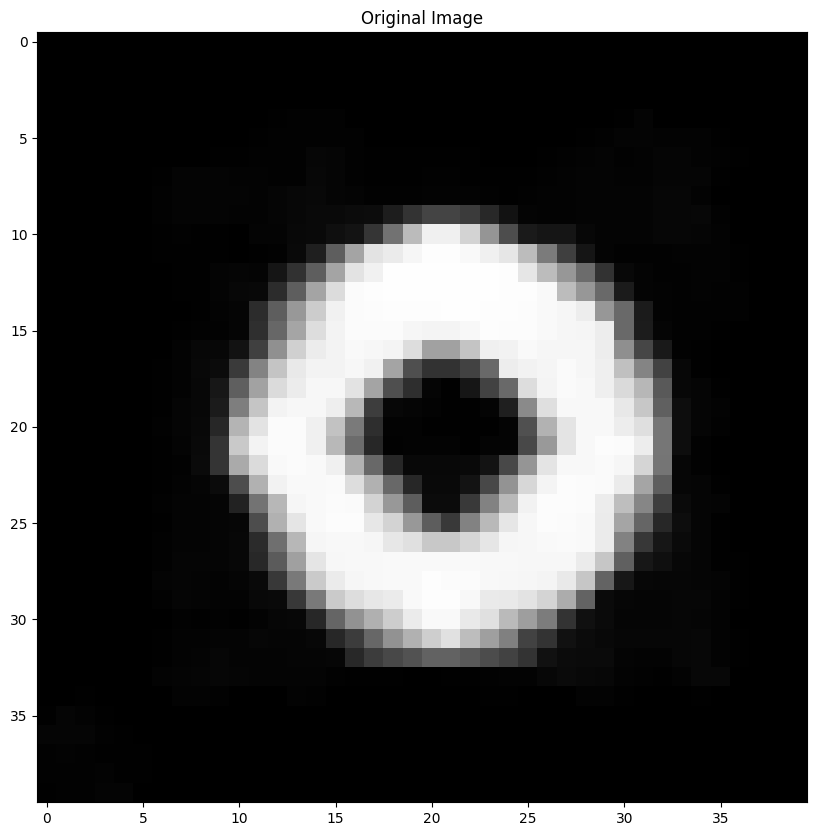

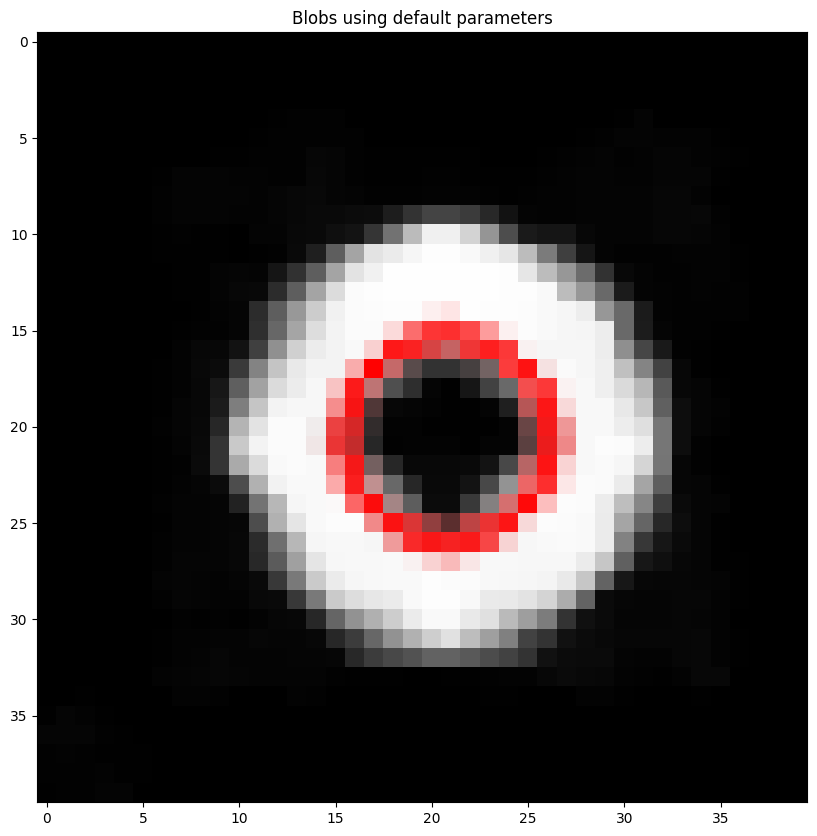

Number of Circular Blobs: 0


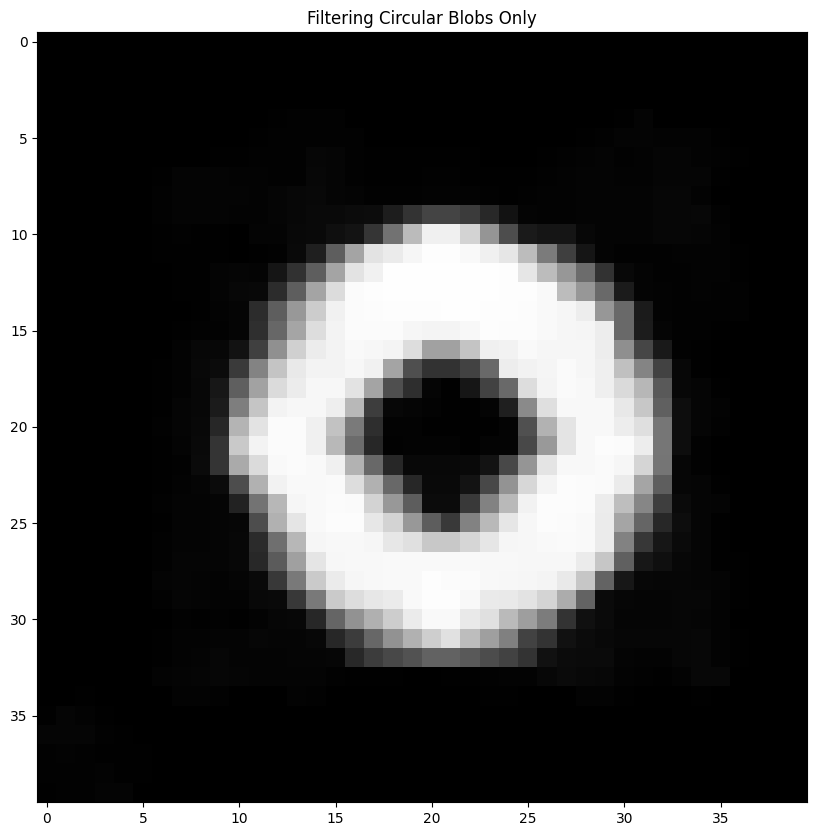

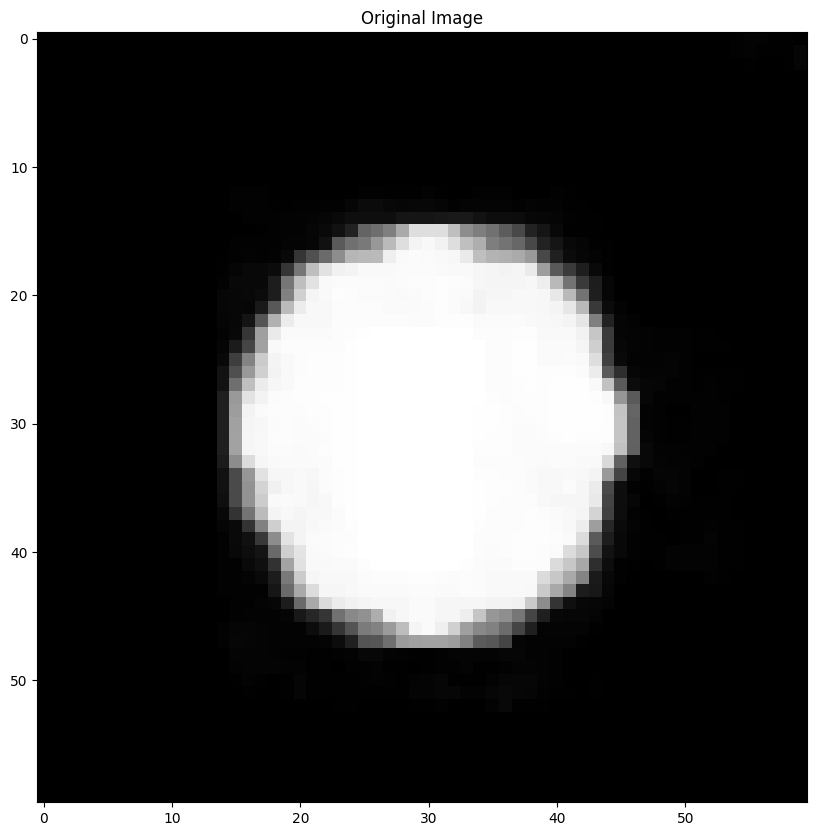

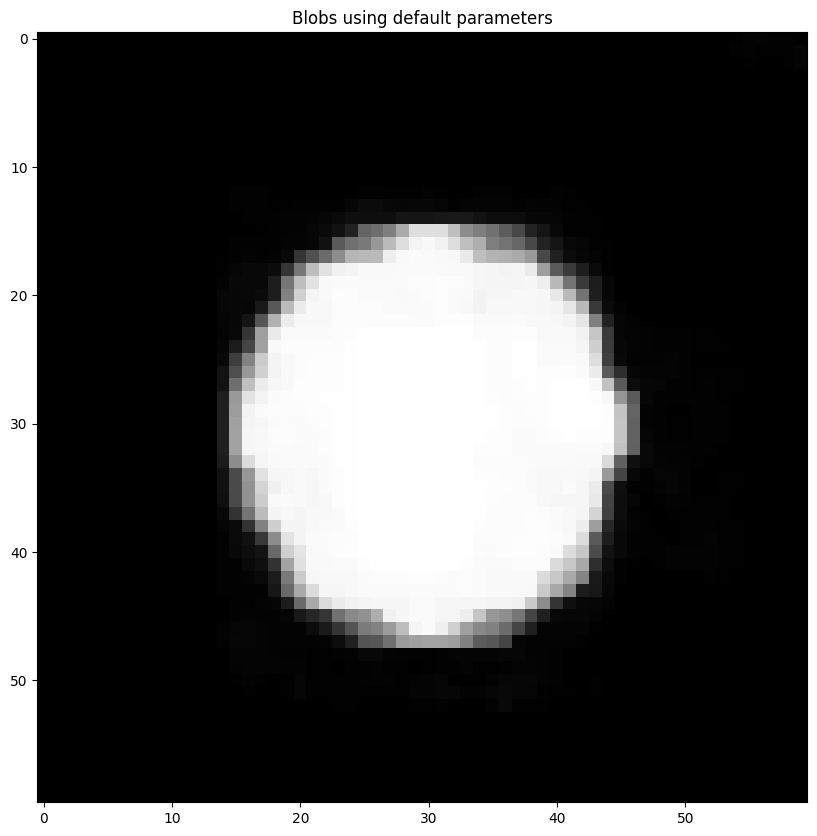

Number of Circular Blobs: 0


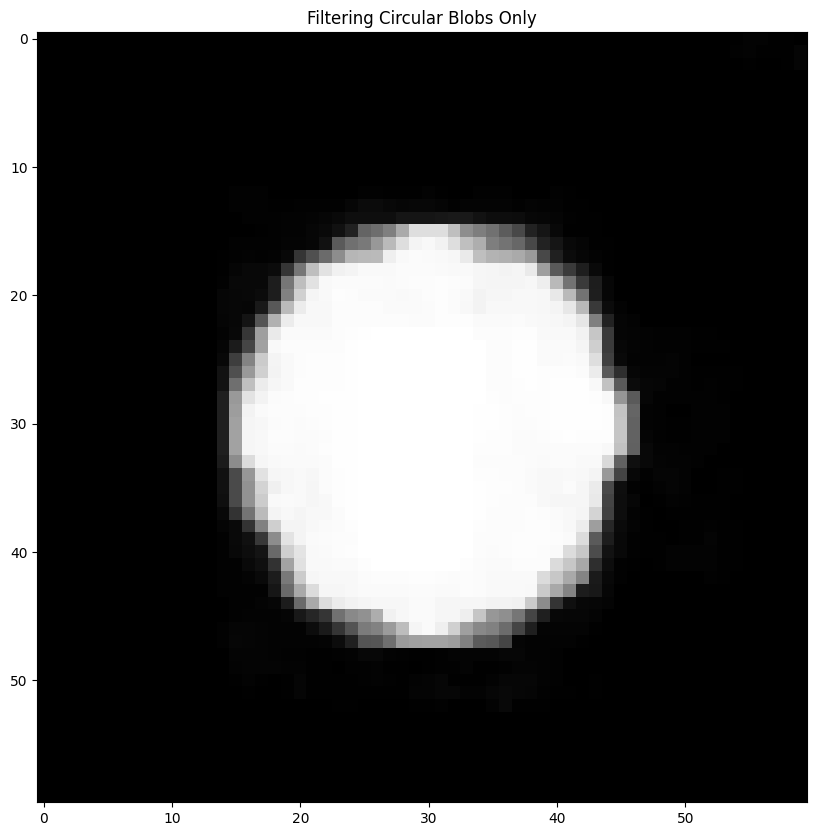

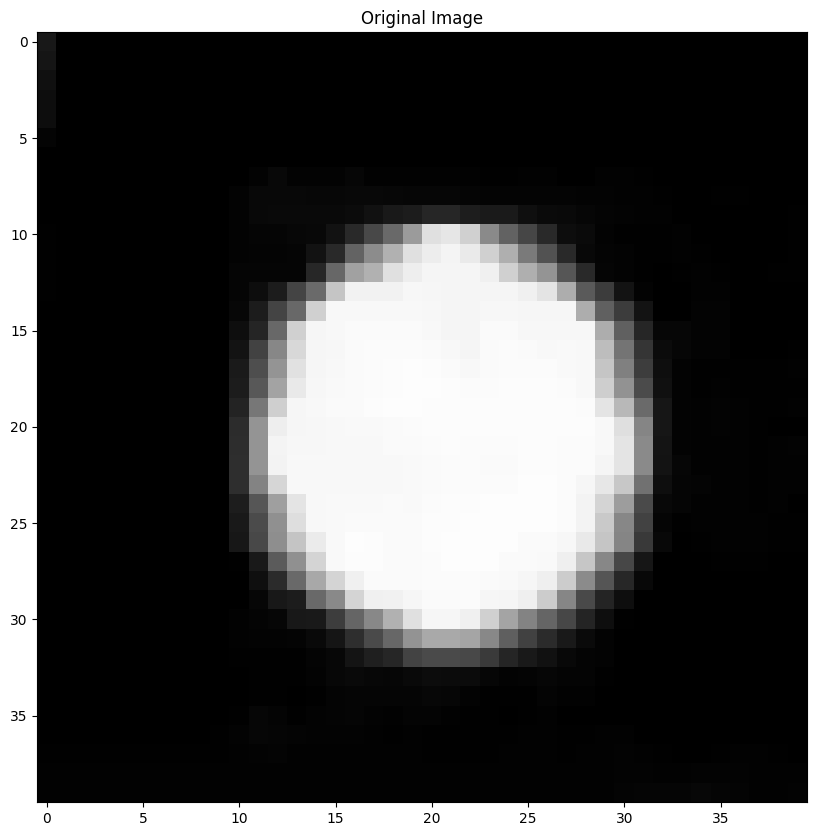

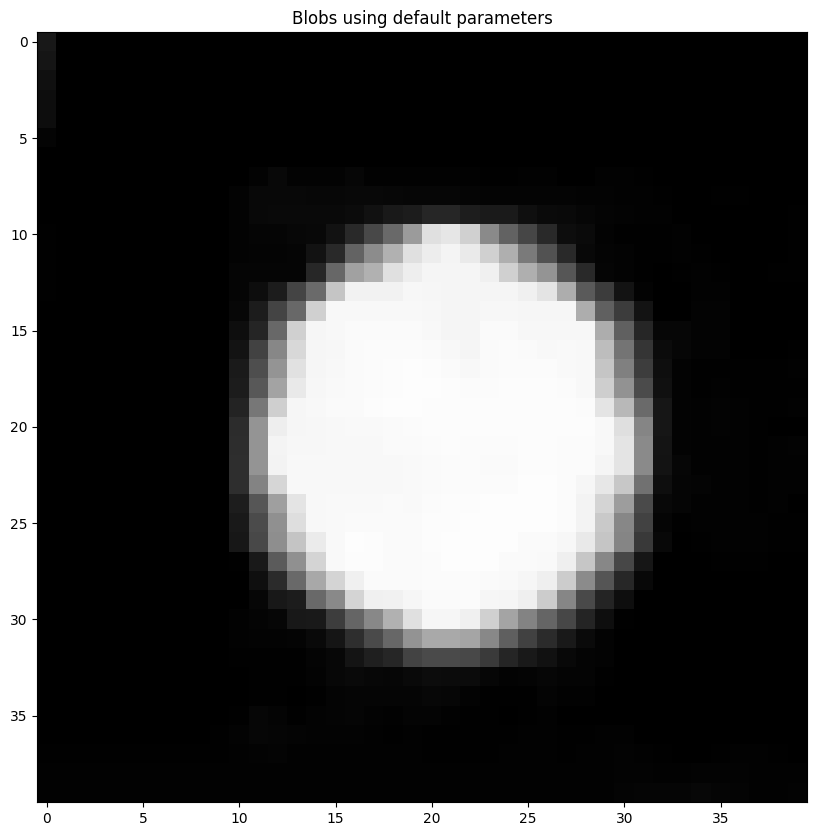

Number of Circular Blobs: 0


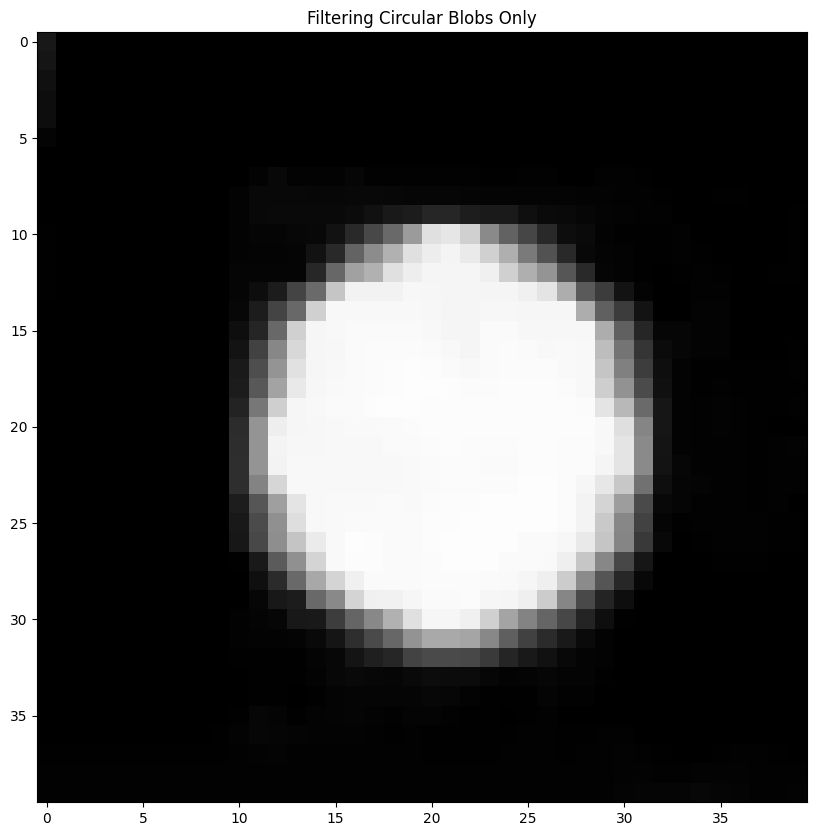

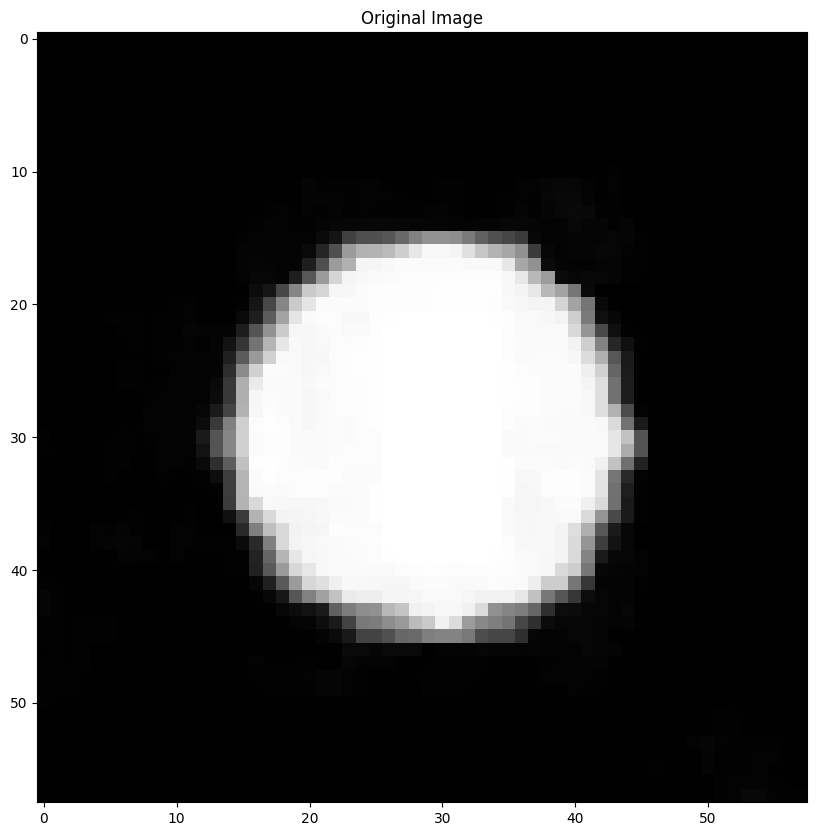

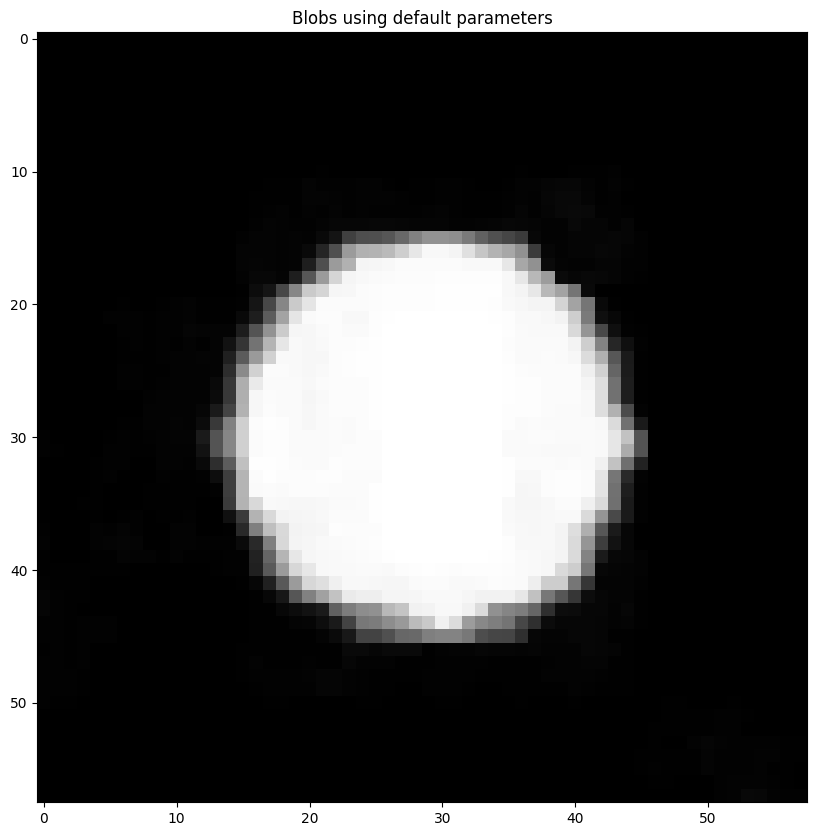

Number of Circular Blobs: 0


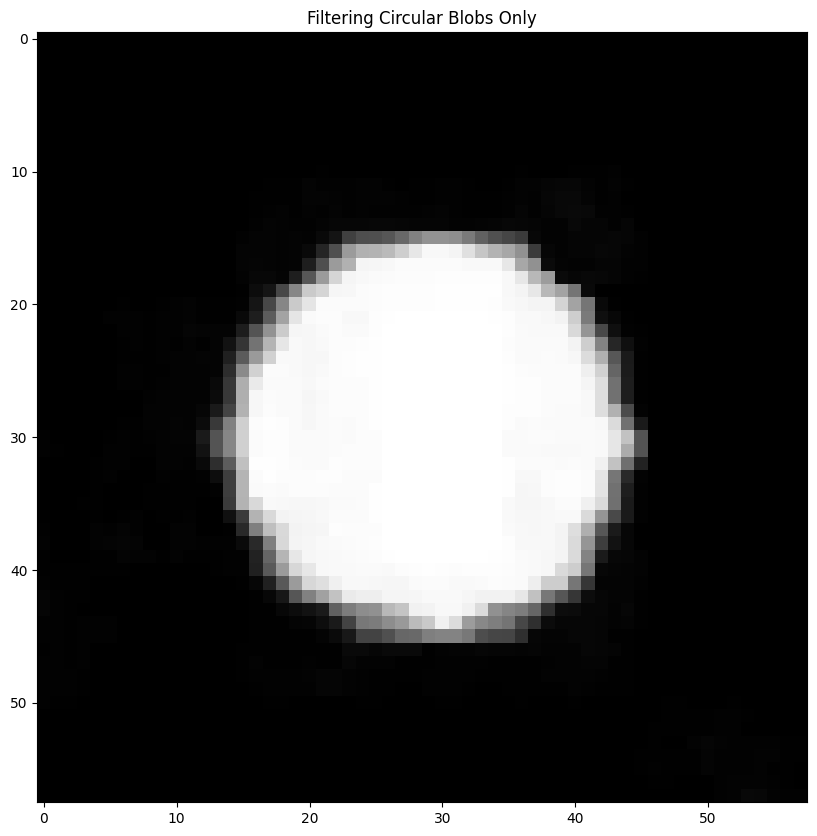

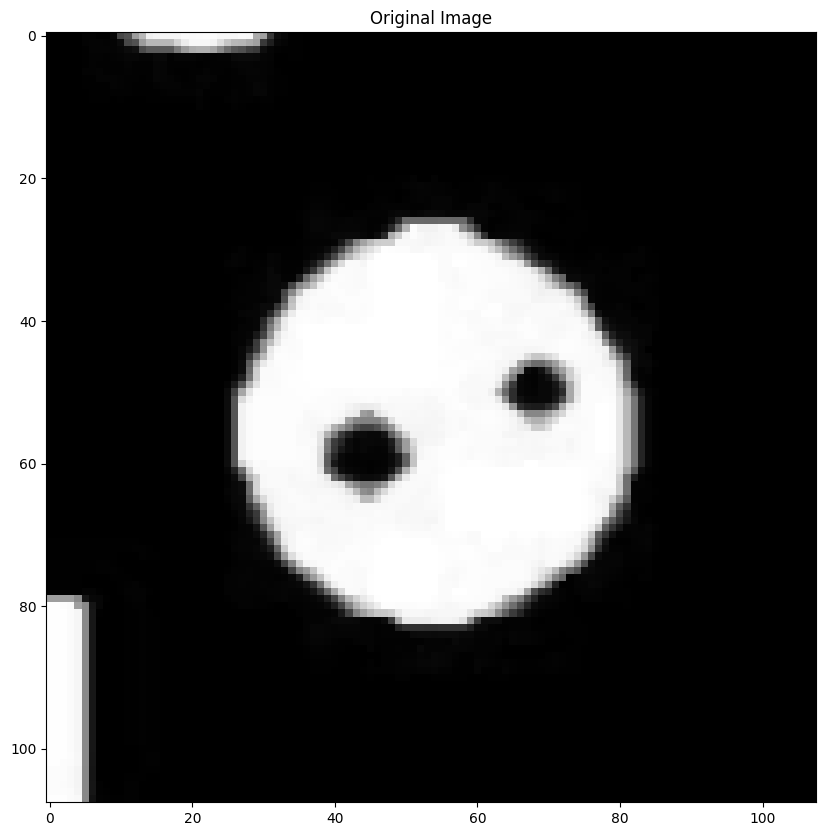

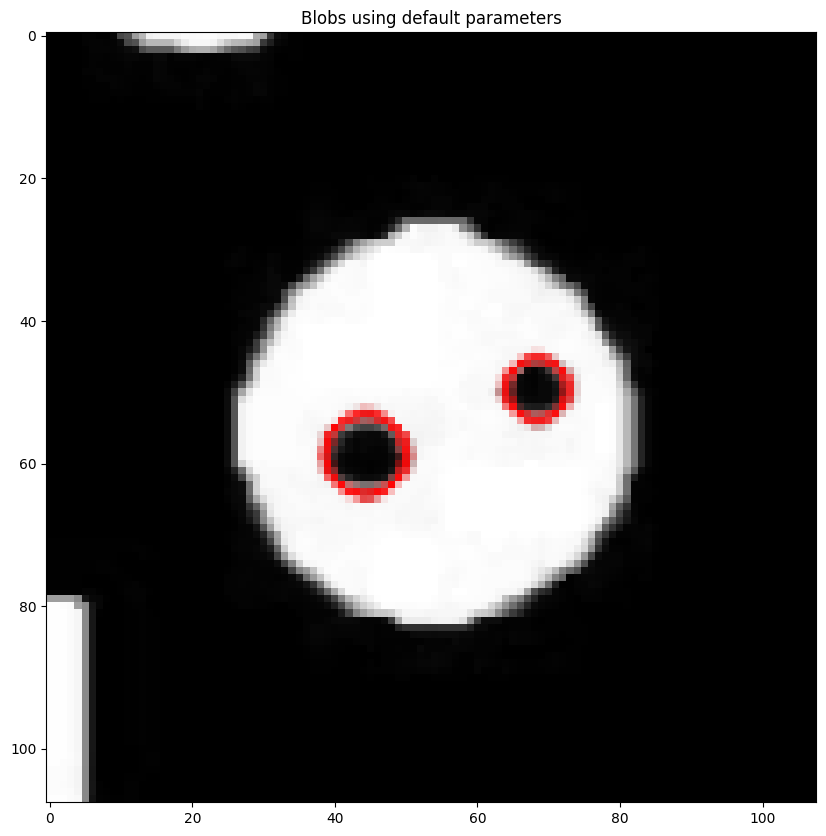

Number of Circular Blobs: 0


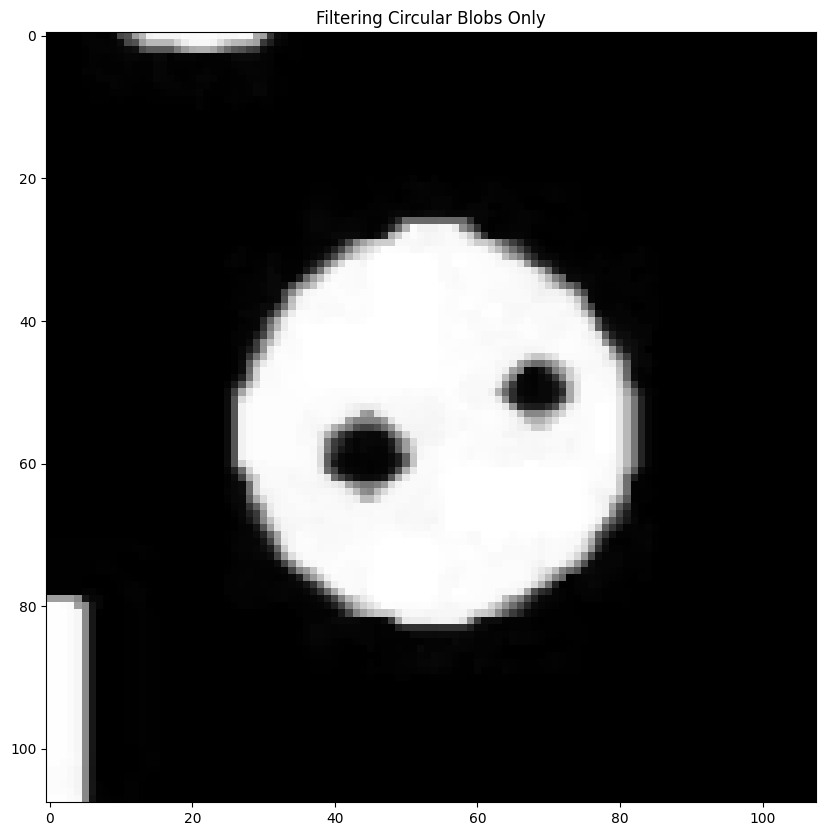

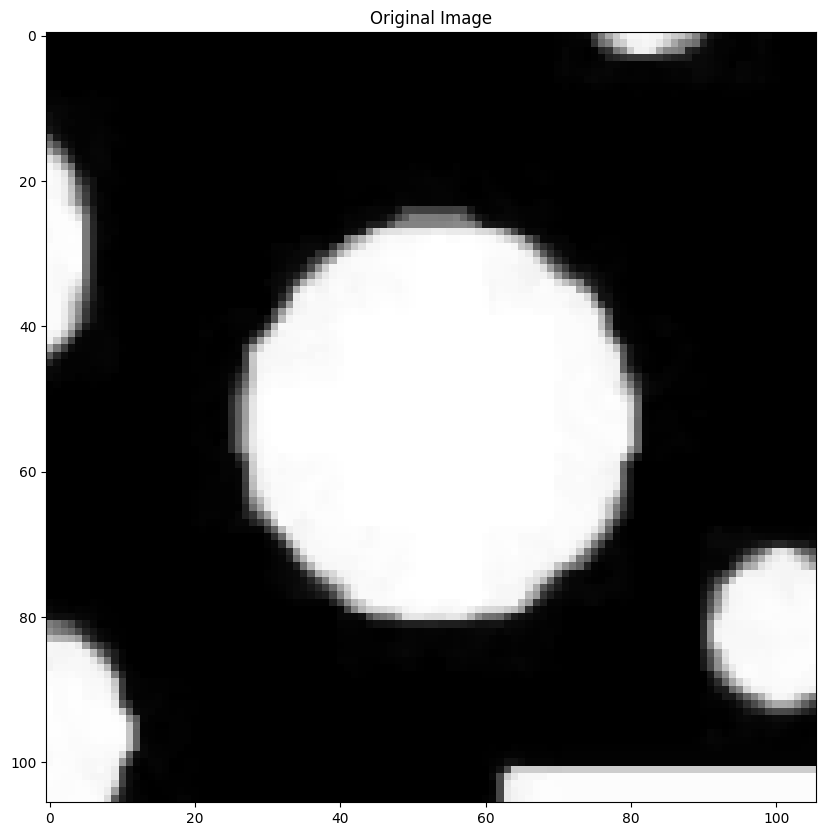

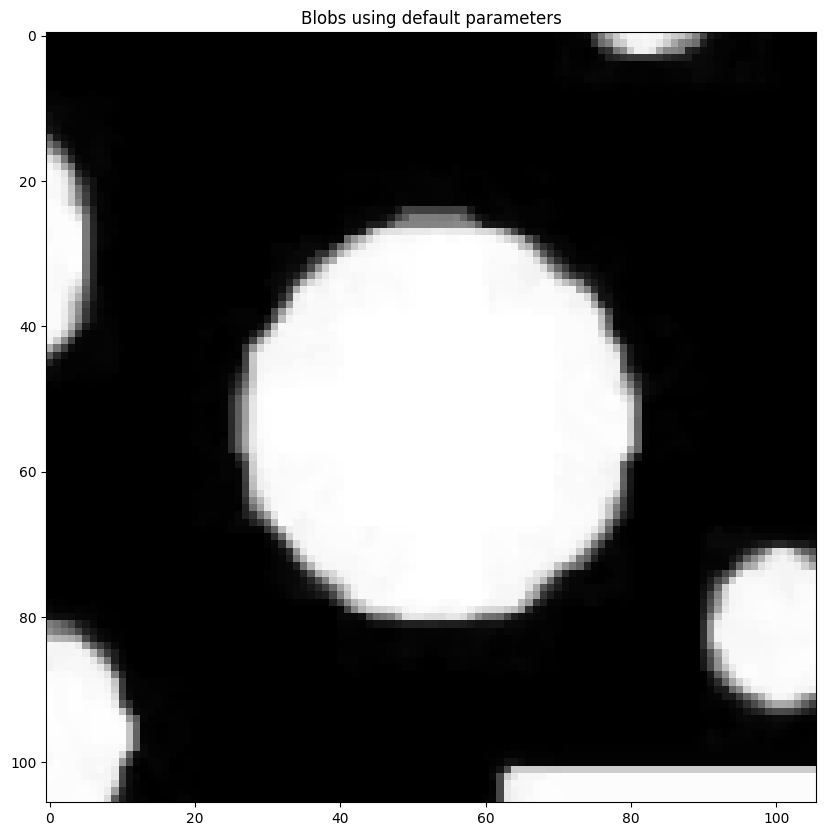

Number of Circular Blobs: 0


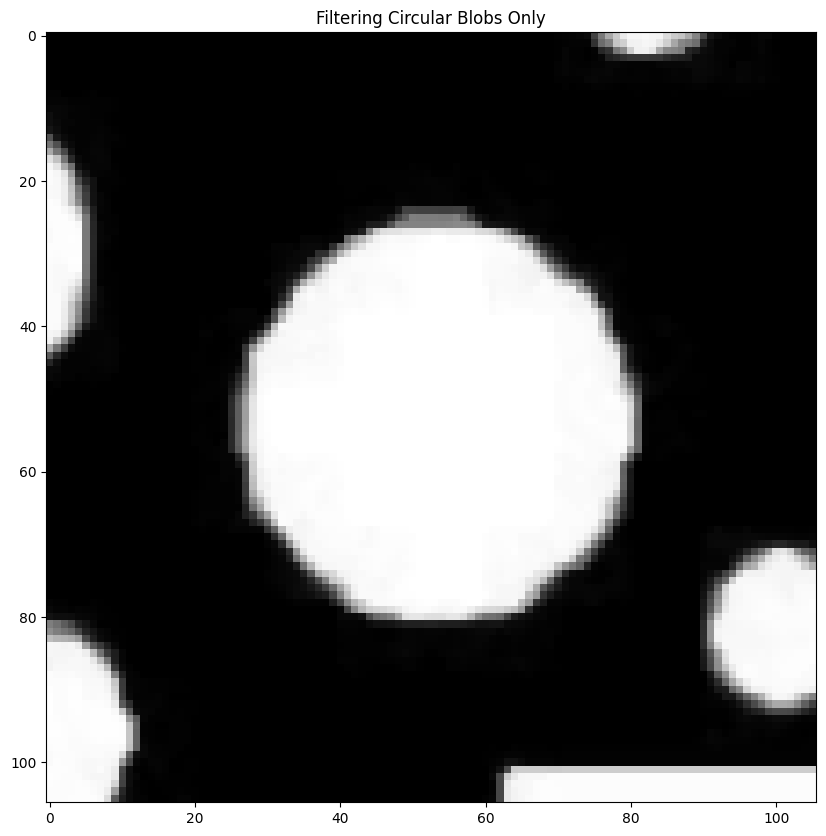

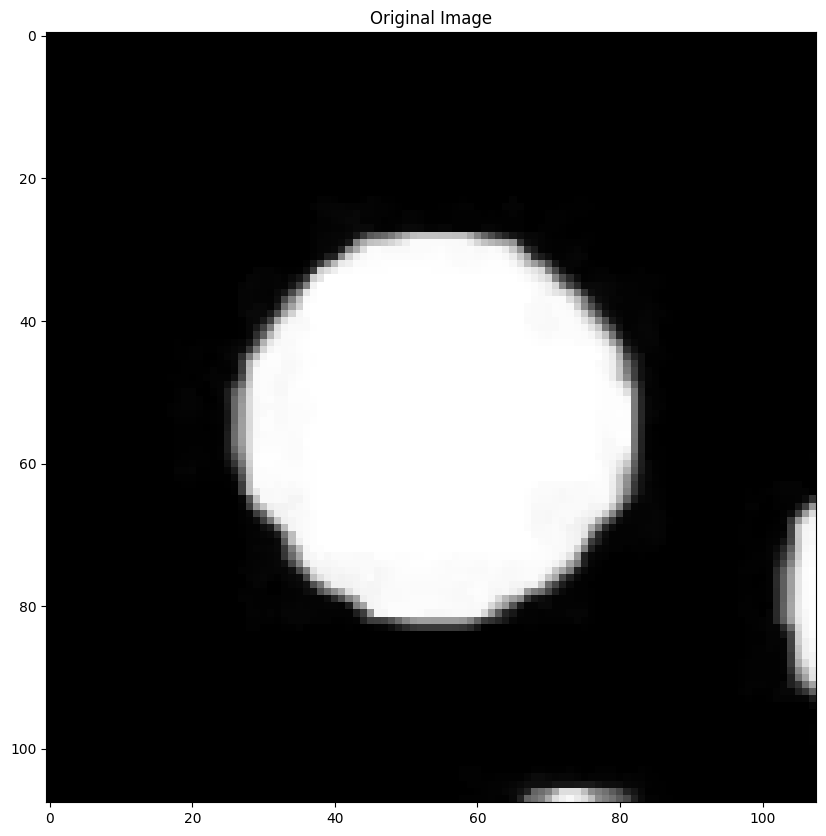

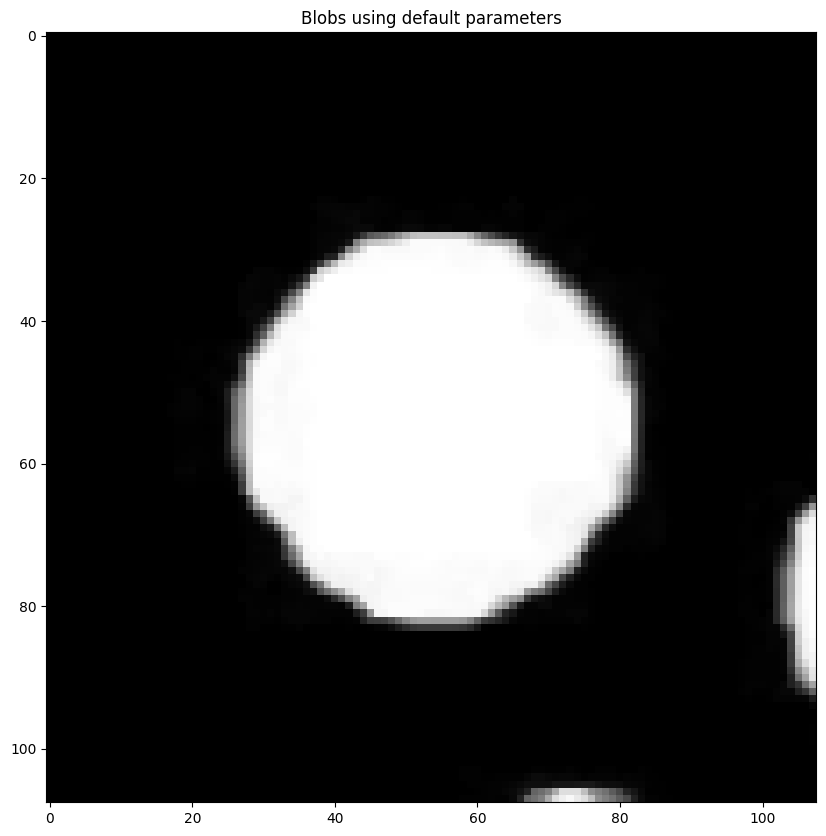

Number of Circular Blobs: 0


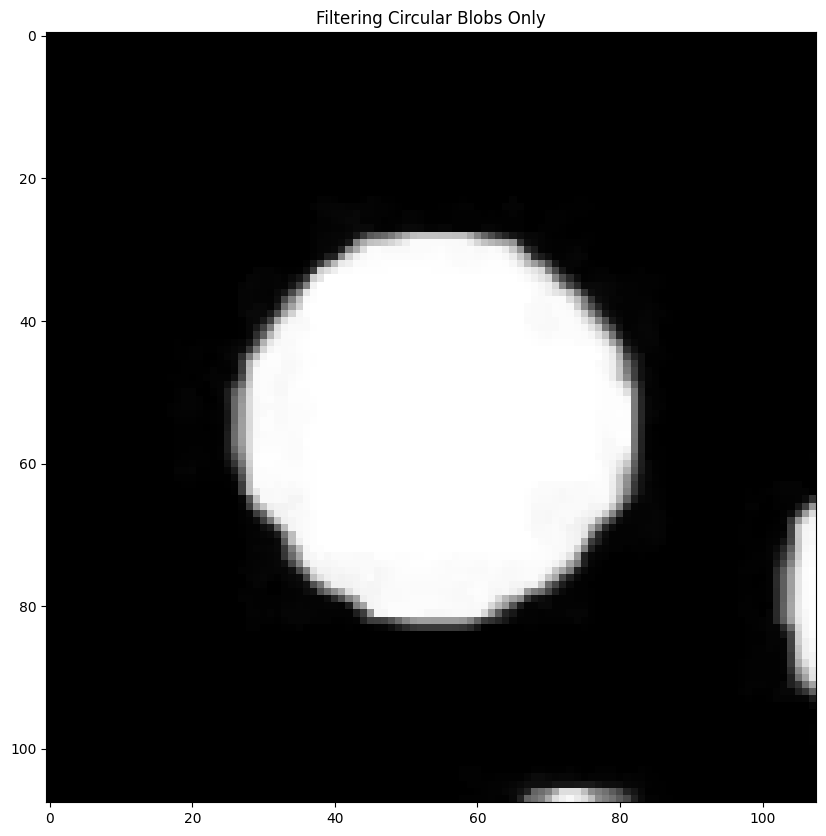

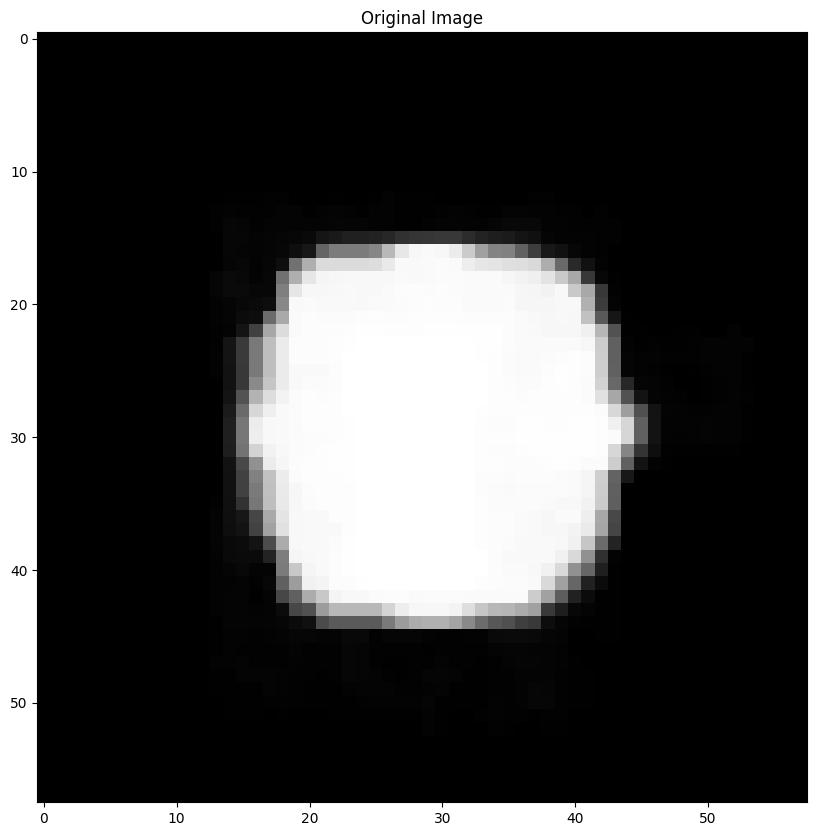

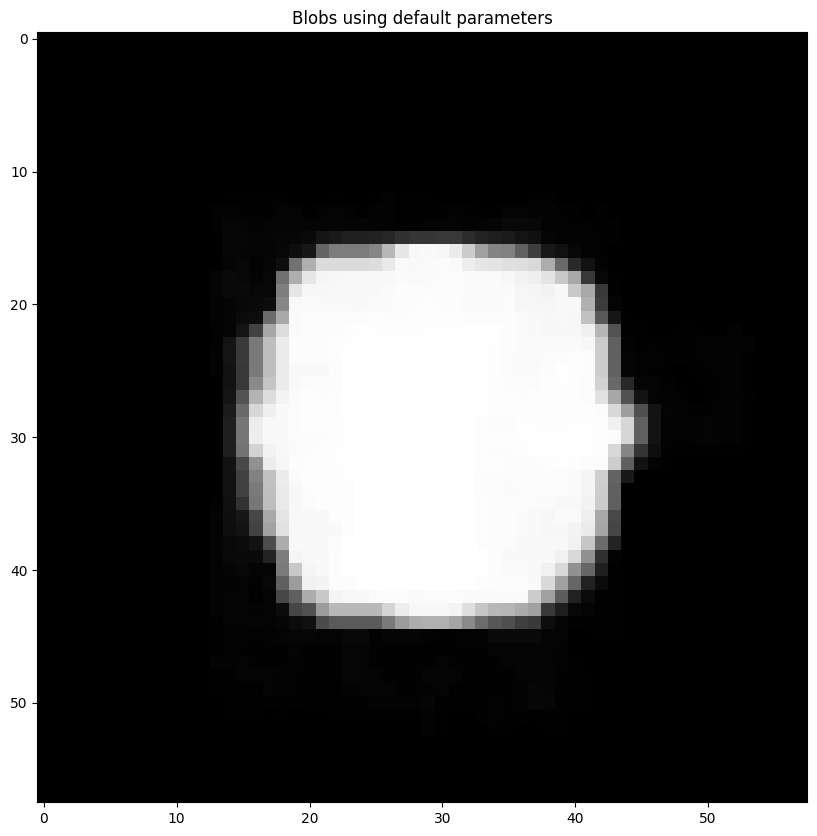

Number of Circular Blobs: 0


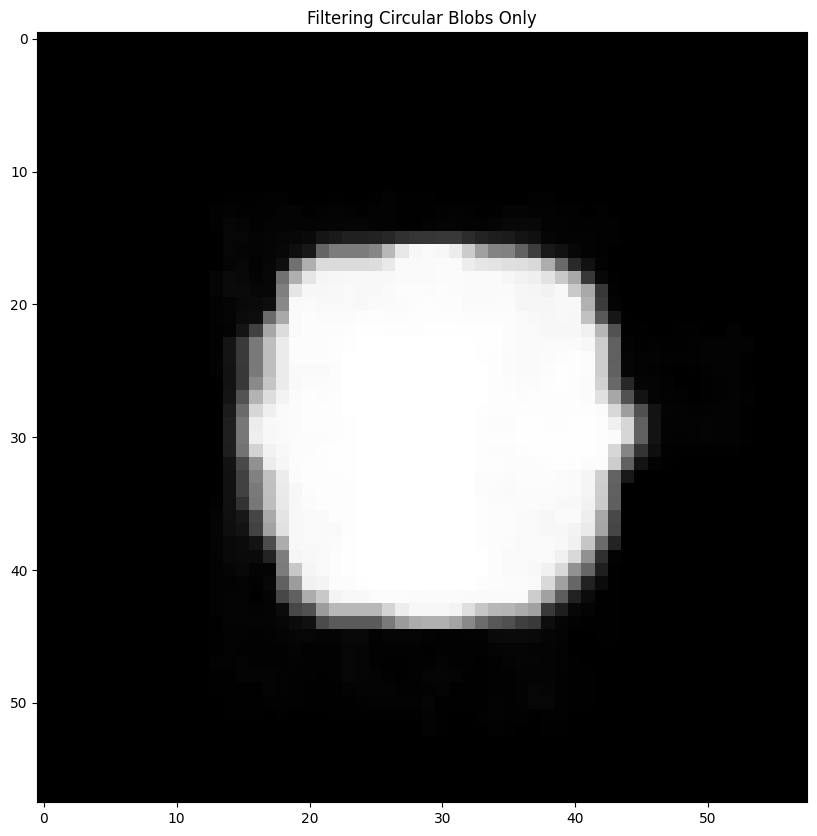

In [ ]:
inner_circle = []
for test in temp:
# Load image
  image = test
  imshow('Original Image',image)

# Intialize the detector using the default parameters
  detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs
  keypoints = detector.detect(image)
 
# Draw blobs on our image as red circles
  blank = np.zeros((1,1)) 
  blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  number_of_blobs = len(keypoints)
  b1 = number_of_blobs
  text = "Total Number of Blobs: " + str(len(keypoints))
  cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
  imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
  params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
  params.filterByArea = True
  params.minArea = 100

# Set Circularity filtering parameters
  params.filterByCircularity = True 
  params.minCircularity = 0.9

# Set Convexity filtering parameters
  params.filterByConvexity = False
  params.minConvexity = 0.2
    
# Set inertia filtering parameters
  params.filterByInertia = True
  params.minInertiaRatio = 0.01

# Create a detector with the parameters
  detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
  keypoints = detector.detect(image)

# Draw blobs on our image as red circles
  blank = np.zeros((1,1)) 
  blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  number_of_blobs = len(keypoints)
  b2 = number_of_blobs
  text = "Number of Circular Blobs: " + str(len(keypoints))
  print(text)
  cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

  if b1 > 0 or b2 > 0:
    inner_circle.append(True)
  else:
    inner_circle.append(False)
# Show blobs
  imshow("Filtering Circular Blobs Only", blobs)


In [ ]:
inner_circle.append(True) # ONE VALUE SHORT NOT WORTH THE DEBUGGING TIME 

### Results

In [ ]:
df['inner_circle'] = inner_circle
df

,X-cordinate,Y-cordinate,Radius,Area,inner_circle
0,112,345,20.0,1256.637061,False
1,341,336,54.0,9160.884178,False
2,160,317,54.0,9160.884178,True
3,122,274,29.0,2642.079422,False
4,303,244,20.0,1256.637061,False
5,88,211,54.0,9160.884178,False
6,322,183,19.0,1134.114948,False
7,136,178,20.0,1256.637061,True
8,98,130,30.0,2827.433388,False
9,202,115,20.0,1256.637061,False
